<a href="https://colab.research.google.com/github/Ahmed23Adel/Student-performance/blob/main/Student_performace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importing libraries

In [563]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import scipy as sp
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import xgboost
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# 2.0 Importing data

UCI provieds -student-pot.csv and studnet-mat. we suppose mat to be test set adn por to be train. but data size is so small so we might concatenate them and then split them later. and split them

In [2]:
path1="/content/student-por.csv"
path2="/content/student-mat.csv"
df_por = pd.read_csv(path1, sep =";")
df_mat = pd.read_csv(path2, sep =";")
df=pd.concat((df_por, df_mat))

In [3]:
df.shape

(1044, 33)

### 2.1 problem definition and columns
data is dealing with students performance in the capturing some attributes that are thought to be affecting their grades like father's job, mother's job....etc.

Columns:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target) 

# 3.0 Questions

1. which sex has higher grades in each exam?
2. do students who are older; have more chances to get higher grades? (because they should have more awareness) or they just have failed and don't care about the class?
3. what are most interesting characteristics for student who have failed at least once?
4. Does address affect student performance? (in each exam!!)
5. does parent status affect student performance overall?
6. how mother's and fathers' education affect student performance?
7. if parents are apart; does it affect which guardian guard student in his grades?
8. if a student's home is far away from school, does that affect student's performance?
9. how does family size affect student performace?
10. how many hours (in study time) should students have to get grades greater than half? and greater than average? 
11. is it necessary to have family support in education to get grades greater than average or greater than half?
12. do extra activities put more burden on students? can they also get a high grade while they do them?
13. Is grades affected by romantic relationships?
14. Is grades affected by alcohol?
15. is wanting to go to high school enough motivation to get high grades?
16. how internet access affect student performance? does it distract them(Social media) or help him?
17. if a student has free time, does that release some tension out of him so that he can study well?
18. is absence an indicator that students will have bad grades?  

# 4.0 Cleaning

In [4]:
df=df.reset_index(drop=True);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [6]:
print("training Data has {} missing values".format(df.isna().sum().sum()))
print("test Data has {} missing values".format(df.isna().sum().sum()))

# nulls

training Data has 0 missing values
test Data has 0 missing values


That's **GREATE**!! no missing values

In [7]:
print("training Data has {} duplicated values".format(df.duplicated().sum().sum()))
# No duplication

training Data has 0 duplicated values


In [8]:
df_disc=df.copy(deep=True)
df_disc.loc[(df_disc.G3 >= 15) & (df_disc.G3 <= 20), 'final_grade'] = 'very good' 
df_disc.loc[(df_disc.G3 >= 10) & (df_disc.G3 <= 14), 'final_grade'] = 'good' 
df_disc.loc[(df_disc.G3 >= 0) & (df_disc.G3 <= 9), 'final_grade'] = 'bad' 

In [9]:
df_disc.final_grade.value_counts()

good         610
bad          230
very good    204
Name: final_grade, dtype: int64

# 5.0 EDA

here we will answer all question proposed in section 3, and do many univariate and bivariate analysis

### 5.1 Univariate

In [10]:
sns.set_style("whitegrid")

<Figure size 432x288 with 0 Axes>

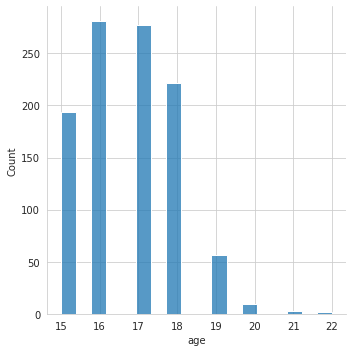

<Figure size 432x288 with 0 Axes>

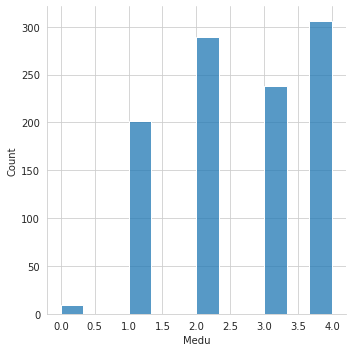

<Figure size 432x288 with 0 Axes>

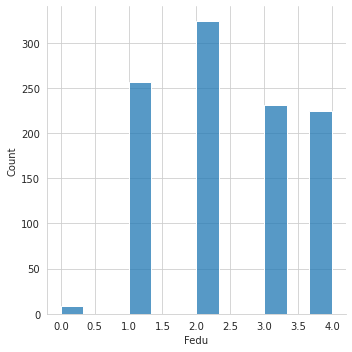

<Figure size 432x288 with 0 Axes>

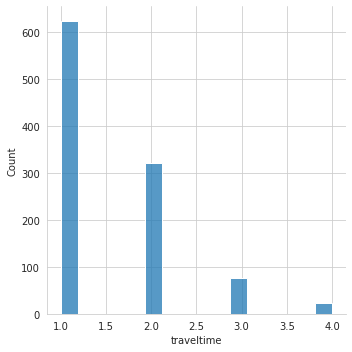

<Figure size 432x288 with 0 Axes>

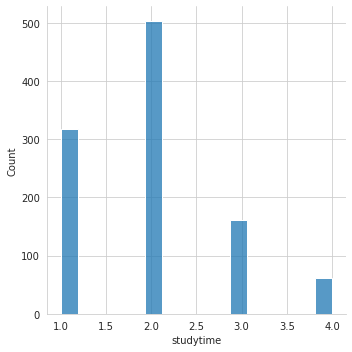

<Figure size 432x288 with 0 Axes>

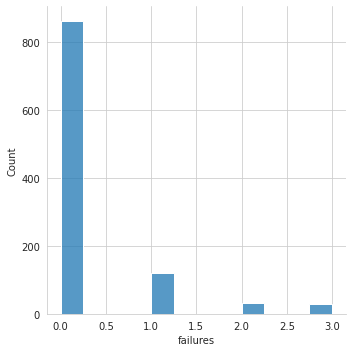

<Figure size 432x288 with 0 Axes>

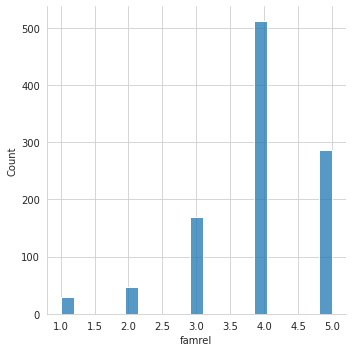

<Figure size 432x288 with 0 Axes>

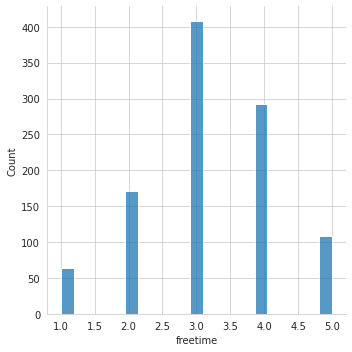

<Figure size 432x288 with 0 Axes>

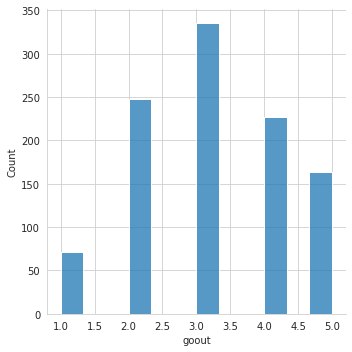

<Figure size 432x288 with 0 Axes>

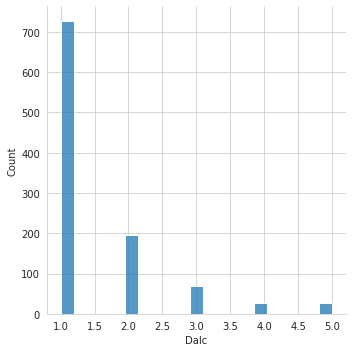

<Figure size 432x288 with 0 Axes>

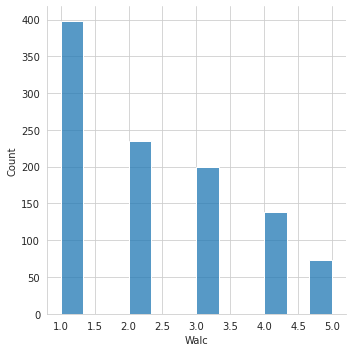

<Figure size 432x288 with 0 Axes>

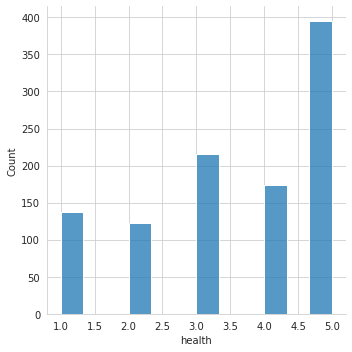

<Figure size 432x288 with 0 Axes>

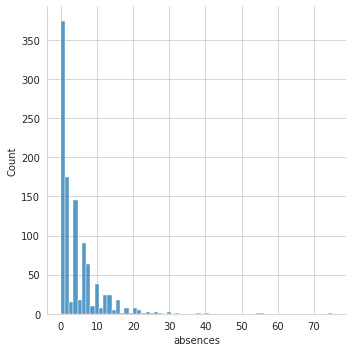

<Figure size 432x288 with 0 Axes>

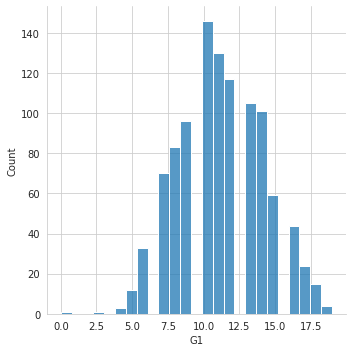

<Figure size 432x288 with 0 Axes>

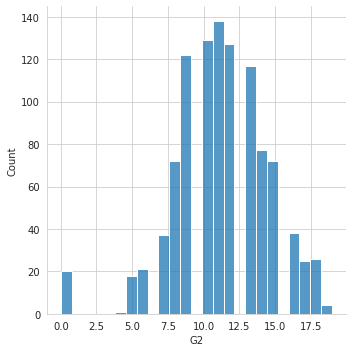

<Figure size 432x288 with 0 Axes>

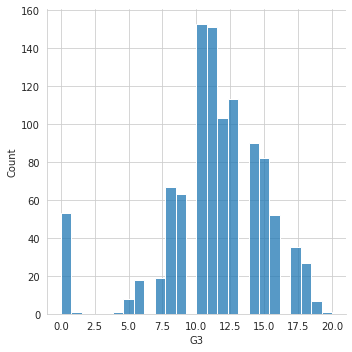

In [11]:
plt.rcParams.update({'figure.max_open_warning': 0})
for column in df.select_dtypes(np.number).columns:
    plt.figure();             # <==================== here!
    ax = sns.displot(df[column]);


In [12]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


* age: age column is left-skewed, meaning most people at secondary school are between 15 and 18, only a few are between 19-22. mean value is 16.

* Mother& father education: most mothers are highly educated as data is left-skewed

* travel time: Right skewed column, most students are close to the school. they mostly take less than 15 minutes

* study time. nearly normally distributed, most of them study for about 2 hours.

* failures. totally right-skewed. about 800 out of 1000 rows never failed.

* family relation: most of the students are having good family relationships

* free time: normally distributed column, the peak is at 3 hours.

* gout: normally distributed, and the peak is at 3 hours.

* Daily alcholic. most students dring very low(600 out 1000)

* Weekend alcholic: for weekend consumption. it's right-skewed, but still about half of them have very low consumption.

* health: left-skewed data. most of them have good health

* absences: totally right-skewed, max is at 80, and CDF nearly reached 0.95 at 20 days. mean value is 4 days. and the standard deviation is 6 days

* G1, first exam results. is totally normally distributed, mean is at 11


* G2 second exam results. is totally normally distributed, mean is at 11

* G3: final exam result. is totally normally distributed, mean is at 11






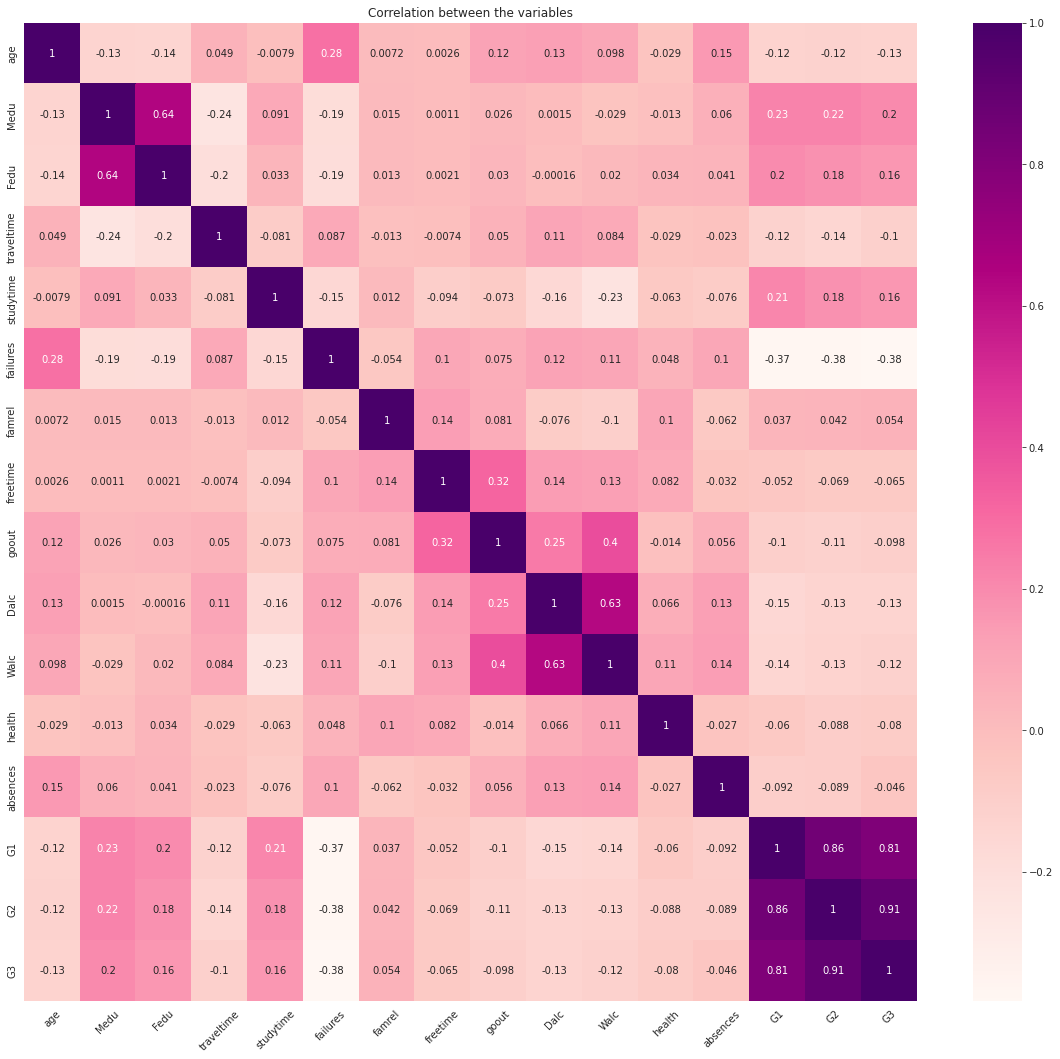

In [13]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(20,18))         # Sample figsize in inches
sns.heatmap(df.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



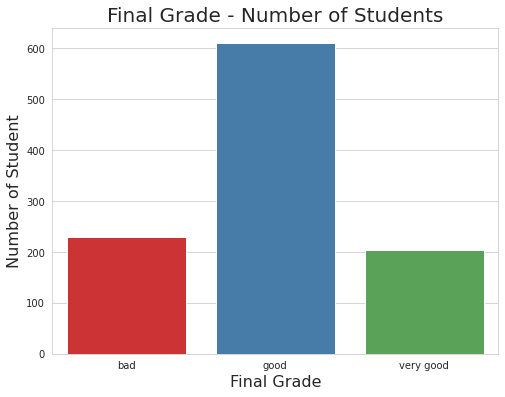

In [14]:
plt.figure(figsize=(8,6));
sns.countplot(df_disc.final_grade, order=["bad","good","very good"], palette='Set1');
plt.title('Final Grade - Number of Students',fontsize=20);
plt.xlabel('Final Grade', fontsize=16);
plt.ylabel('Number of Student', fontsize=16);
plt.show();

we see here that most students get good grades between 10 and 14

### 5.1 which sex has higher grades in each exam?

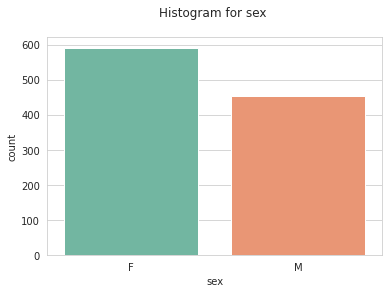

In [15]:
sns.countplot(x='sex', data=df, palette='Set2').set_title("Histogram for sex \n")
plt.show()

In [16]:
print("Percentage of male: {:.2f}% and females: {:.2f}%".format(100*len(df.query("sex == 'M'"))/len(df), 100*(1-(len(df.query("sex == 'M'")))/len(df))))

Percentage of male: 43.39% and females: 56.61%


Data is nearly balanced in between males and females, males have $44$% anmd famales have about $66$%

In [17]:
df_disc_tmp=df.copy(deep=True)
df_disc_tmp['G3'] = df_disc_tmp['G3'].apply(lambda x: 1 if x>15 else 0)
df_disc_tmp['final exam grade']=df_disc_tmp.G3

we will consider any grader greater than 15 to be high and anything less than that to be low.


Text(0.5, 1.0, 'sex vs Final grade,\n final grade ==1 then higher than 15,\n if 0 then less than 15')

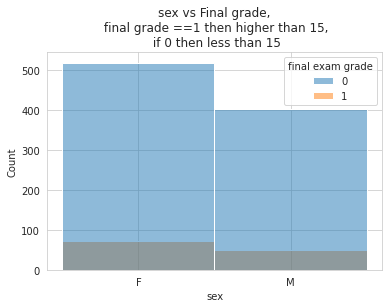

In [631]:
ax=sns.histplot(df_disc_tmp, x='sex', hue='final exam grade')
ax.set_title('sex vs Final grade,\n final grade ==1 then higher than 15,\n if 0 then less than 15')

for people having grader greater than 15:


there was $72$ females($6.8$%), and only $50$ males($4.8$% ). 

for less than 15
there was $519$ females($49.7$%) and $403$ males($38.6$%)

this is not analogous to that same distribution of men and women, $56.6$% females and $43.9$% males, $\frac{56.6}{43.9} \neq \frac{6.8}{4.8}$ 
 

Let's try hypothesis testing!!

Null hypothesis: Males grades is equal to females grades

In [19]:
fem_avg=df.query("sex == 'F'")['G3'].mean()

Z score:

$\begin{align}
\frac{\bar{X}-\mu}{σ /\sqrt{n}}
\end{align}
$

In [20]:

sample_males=df.query("sex =='M' ").G3[:100]
z=(sample_males.mean()-fem_avg)/np.sqrt(df.G3.var()/sample_males.size)
print("z-score is {}".format(z))

z-score is 0.46990178576181263


In [21]:
p= sp.stats.norm.cdf(z)
print("p-value is {}".format(p))

p-value is 0.6807874057945449


we see p value is $0.4699$, ($40$% > $5$%) meaning we can accept the null hypothesis

### 5.2 do students who are older; have more chances to get higher grades? (because they should have more awareness) or they just have failed and don't care about the class?

In [636]:
df.sample()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
396,GP,M,18,U,LE3,T,3,4,services,other,home,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,4,3,3,1,3,5,6,16,16,17


In [640]:

'''
ax=sns.scatterplot(df, x='age', y='G3')
ax.set_title("age vs grade in final exam")
ax.set(xlabel='Grade for final exam')
'''
px.scatter(df, x='age', y='G3',
            title="age vs grade in final exam",
                   labels={
                     "G3": "Grade for final exam",
                 },)

In [23]:
print("mean grade for age greater than 18 is {:.2f}".format(df.query("age > 18").G3.mean()))

mean grade for age greater than 18 is 9.40


**secondary education**: the second stage traditionally found in formal education, beginning about age 11 to 13 and ending usually at age 15 to 18 [britannica](https://www.britannica.com/topic/secondary-education)

So we say that max is 18 years old, we find starting from age 19, the performance drops sevely down. max grad for people with age greter than 18 is 18


if student in secondary school this might be due to he\she failed in school, and that's might be an indication that they are not interested in education at all.

but that doesn't mean they are bad in all fields, they might be doing great extra activityes, and may be having parent issues 

Let's explore them in next section!!

### 5.3 what are most interesting characteristics for student who have failed at least once?

In [24]:
df_failed=df.query("failures >0")
df_failed.shape

(183, 33)

we have only 33 of them who failed, not big data to make sure of our results. but we are going to to do it anyway

Text(0.5, 1.0, 'Histrogram for age for different failures')

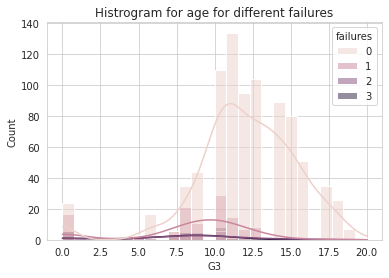

In [25]:
sns.histplot(df, x='G3', hue='failures', kde=True).set_title("Histrogram for age for different failures")

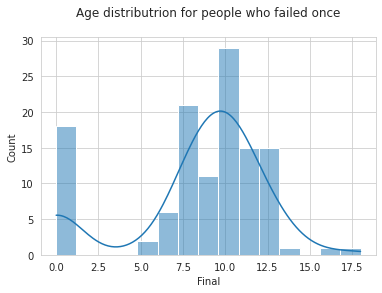

In [26]:
ax=sns.histplot(df_failed.query('failures==1'), x='G3', kde=True);
ax.set(xlabel='Final');
ax.set_title("Age distributrion for people who failed once\n");
plt.show()

most people who have failed once, they have an average grade 10, and max 17.5

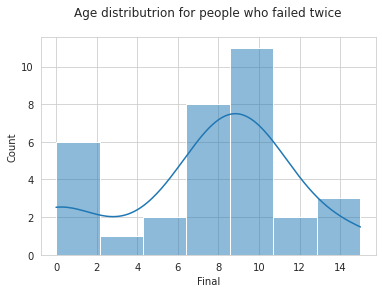

In [27]:
ax=sns.histplot(df_failed.query('failures==2'), x='G3', kde=True);
ax.set(xlabel='Final');
ax.set_title("Age distributrion for people who failed twice\n");
plt.show()

most people who have failed once, they have an average grade 10, and max 14

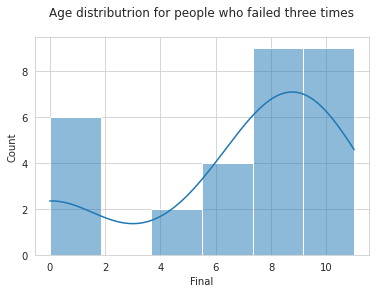

In [28]:
ax=sns.histplot(df_failed.query('failures==3'), x='G3', kde=True);
ax.set(xlabel='Final');
ax.set_title("Age distributrion for people who failed three times\n");
plt.show()

most people who have failed once, they have an average grade 10, and max 10

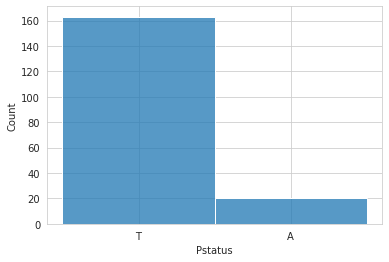

In [29]:
sns.histplot(df_failed, x='Pstatus')

**Test hypothesis**

students with apart parent have same grade as living together

In [30]:
living_avg_grade=df.query("Pstatus == 'T'").G3.mean()
sample_apart=df.query("Pstatus =='A'").sample(100)
apart_avg_grade=sample_apart.G3.mean()
z=(apart_avg_grade-living_avg_grade)/np.sqrt(df.G3.var()/100)
p=sp.stats.norm.cdf(z)
print("p-value {}".format(p))

p-value 0.8502500686673378


p value is $78$% so we can accept it. and state that being in apart or living togther family doesn't affect their performance

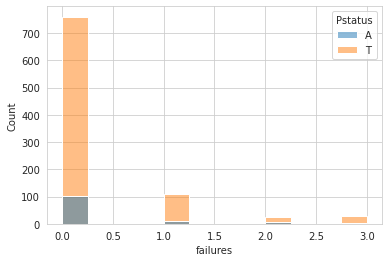

In [31]:
sns.histplot(df, x='failures', hue='Pstatus')

Noting ther are more people who are have their parent living together failed more.

parents breakups doesn't seem to affect very badly to students performance. we read a lot that ensure that.

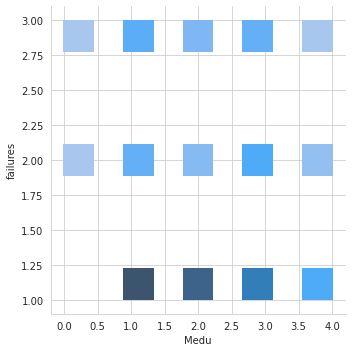

In [32]:
sns.displot(df_failed,x='Medu', y='failures' )

In [33]:
df_failed.query("Medu == 1")['failures'].value_counts()

1    43
3    11
2    10
Name: failures, dtype: int64

In [34]:
df_failed.query("Fedu == 1")['failures'].value_counts()

1    40
3    20
2    11
Name: failures, dtype: int64

In [35]:
df_failed.query("Medu == 2")['failures'].value_counts()

1    37
3     7
2     6
Name: failures, dtype: int64

In [36]:
df_failed.query("Fedu == 2")['failures'].value_counts()

1    40
2    13
3     8
Name: failures, dtype: int64

In [37]:
df_failed.query("Medu == 3")['failures'].value_counts()

1    28
2    12
3    10
Name: failures, dtype: int64

In [38]:
df_failed.query("Fedu == 3")['failures'].value_counts()

1    22
2     5
3     1
Name: failures, dtype: int64

In [39]:
df_failed.query("Medu == 4")['failures'].value_counts()

1    12
2     4
3     1
Name: failures, dtype: int64

In [40]:
df_failed.query("Fedu == 4")['failures'].value_counts()

1    16
2     4
3     1
Name: failures, dtype: int64

In [41]:
df_failed.query("Mjob == 'at_home'")['failures'].value_counts()

1    31
3     9
2     6
Name: failures, dtype: int64

In [42]:
df_failed.query("Mjob == 'services'")['failures'].value_counts()

1    29
2    12
3     9
Name: failures, dtype: int64

In [43]:
df_failed.query("Mjob == 'teacher'")['failures'].value_counts()

1    4
Name: failures, dtype: int64

In [44]:
df_failed.query("Mjob == 'health'")['failures'].value_counts()

1    7
3    2
2    2
Name: failures, dtype: int64

In [45]:
df_failed.query("Mjob == 'other'")['failures'].value_counts()

1    49
2    13
3    10
Name: failures, dtype: int64

In [46]:
df_failed.query("Fjob == 'at_home'")['failures'].value_counts()

1    11
3     2
2     2
Name: failures, dtype: int64

In [47]:
df_failed.query("Fjob == 'services'")['failures'].value_counts()

1    39
3    10
2     9
Name: failures, dtype: int64

In [48]:
df_failed.query("Fjob == 'teacher'")['failures'].value_counts()

1    3
2    1
Name: failures, dtype: int64

In [49]:
df_failed.query("Fjob == 'health'")['failures'].value_counts()

1    4
2    1
Name: failures, dtype: int64

In [50]:
df_failed.query("Fjob == 'other'")['failures'].value_counts()

1    63
2    20
3    18
Name: failures, dtype: int64

In [51]:
df.Mjob.value_counts()

other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64

it's observed as parents education is better, numbers of filters is less, and max number of students who fail at least once decrease with the increase of education level

Although some students' parent's education is high education, they fail 3 times. and for students who have parents with primary education only; mostly fail once.


it's noted when faterh\mother is a teachear, students max fail once not more. and same for at home, it seems when father\mother is at home student fail at most once and numbe is already so small. while when one is working; number of fails increase

Text(0.5, 1.0, 'Histogram for student who have failed once \n having extra acitivites or not \n')

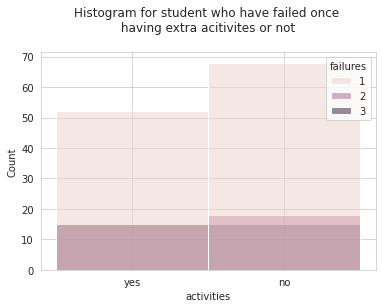

In [52]:
sns.histplot(df_failed,x='activities', hue='failures').set_title("Histogram for student who have failed once \n having extra acitivites or not \n")

Text(0.5, 1.0, 'Histogram for student who have failed once \n having extra acitivites or not \n')

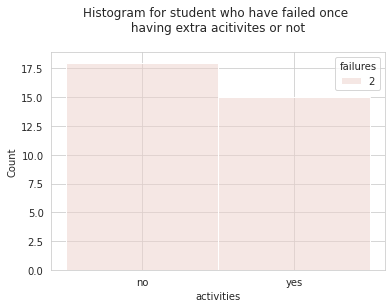

In [53]:
sns.histplot(df_failed.query("failures ==2"),x='activities', hue='failures').set_title("Histogram for student who have failed once \n having extra acitivites or not \n")

Text(0.5, 1.0, 'Histogram for student who have failed once \n having extra acitivites or not \n')

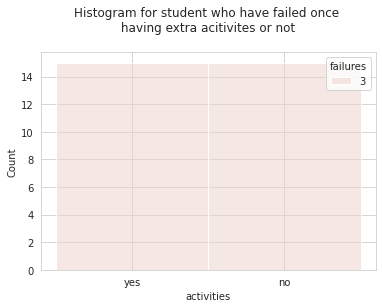

In [54]:
sns.histplot(df_failed.query("failures ==3"),x='activities', hue='failures').set_title("Histogram for student who have failed once \n having extra acitivites or not \n")

In [55]:
print("percentage of people who have failed and had activitesis  {}".format(100*len(df_failed.query("activities =='yes'"))/len(df_failed)))

percentage of people who have failed and had activitesis  44.80874316939891


$44$% of students who fail, have participated in activites. that might let us decide that activies affect badly student performace

but we see that majority of people who failed tree times were having extra activities. **BUT** data size is so small so we can't generalize.


Text(0.5, 1.0, 'Histogram for number of failurs\n for differnt travel time\n 1: 1-15 min \n 2:15-30 min\n 3: 30min - 1 hour \n 4: >1hour')

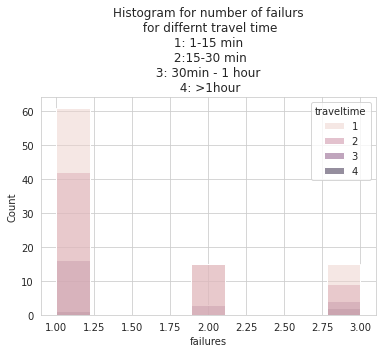

In [56]:
sns.histplot(df_failed, x='failures', hue='traveltime').set_title("Histogram for number of failurs\n for differnt travel time\n 1: 1-15 min \n 2:15-30 min\n 3: 30min - 1 hour \n 4: >1hour")

although people having travel time less than $15$min fail up to 3 times.

but people failing twice, they have always travel time 15-30 minuts

**Test hypothesis**

Null hypothesis: student having travel time greater thatn 15 minuts have same grade as less than 15 minuts (travel time =2)

In [57]:
less_15=df.query("traveltime <= 1").G3.mean()
sample_gt_15=df.query("traveltime > 1").sample(200)
gt_15_avg_grade=sample_gt_15.G3.mean()
z=(gt_15_avg_grade-less_15)/np.sqrt(df.G3.var()/200)
p=sp.stats.norm.cdf(z)
print("p-value {}".format(p))

p-value 0.003767794276217055


p value is $0.1$. so we reject our hypotheses. and we can say it's not due to randomness at all. it's better to get to school that's near to your home.

### 5.4 Does address affect student performance? (in each exam!!)

Text(0.5, 1.0, 'Histogram for address')

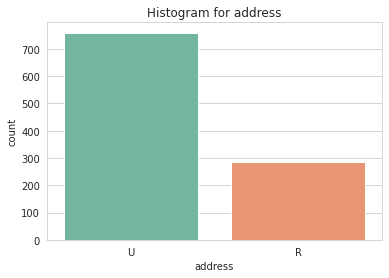

In [58]:
sns.countplot(x='address', data=df, palette='Set2').set_title("Histogram for address")


**data is not balanced in that column at all.**

[Text(0.5, 0, 'Grade for final exam')]

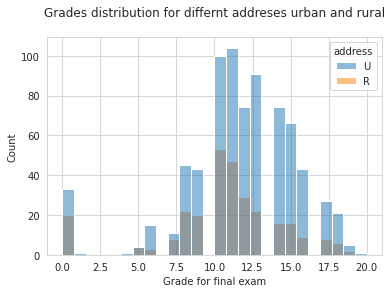

In [59]:
ax=sns.histplot(df,x='G3', hue='address')
ax.set_title("Grades distribution for differnt addreses urban and rural\n")
ax.set(xlabel="Grade for final exam")

[Text(0.5, 0, 'Grade for first exam')]

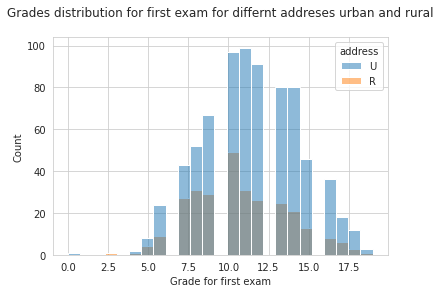

In [60]:
ax=sns.histplot(df,x='G1', hue='address')
ax.set_title("Grades distribution for first exam for differnt addreses urban and rural\n")
ax.set(xlabel="Grade for first exam")

[Text(0.5, 0, 'Grade for second exam')]

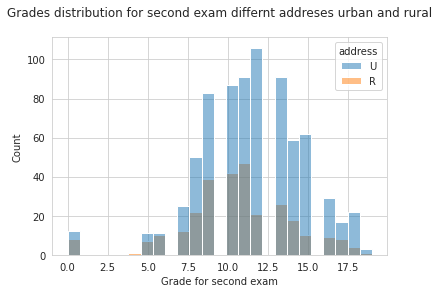

In [61]:
ax=sns.histplot(df,x='G2', hue='address')
ax.set_title("Grades distribution for second exam differnt addreses urban and rural\n")
ax.set(xlabel="Grade for second exam")

**Test hypothesis**

NULL: urban have same avergae grades as rural

In [62]:
rural_avg_grade=df.query("address == 'R'").G3.mean()
sample_urban=df.query("address =='U'").sample(300)
urban_avg_grade=sample_urban.G3.mean()
z=(urban_avg_grade-rural_avg_grade)/np.sqrt(df.G3.var()/200)
p=sp.stats.norm.cdf(z)
print("p-value {}".format(p))

p-value 0.9995259557181324


Unusually high p value indicates the data match the null model suspiciously well.

In [63]:
#from internet
#ad_tab1 = pd.crosstab(index=df_disc.final_grade, columns=df_disc.address)
# #chi-square test result -- significant!
#ad_table = sm.stats.Table(ad_tab1)
#ad_rslt = ad_table.test_nominal_association()
#ad_rslt.pvalue

### 5.5 does parent status affect student performance overall?

[Text(0.5, 0, 'Final exam grade')]

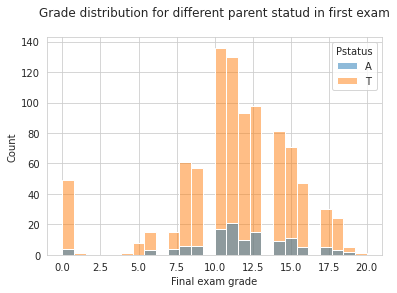

In [64]:
ax=sns.histplot(df,x='G3', hue='Pstatus')
ax.set_title("Grade distribution for different parent statud in first exam\n")
ax.set(xlabel="Final exam grade")

[Text(0.5, 0, 'Final exam grade')]

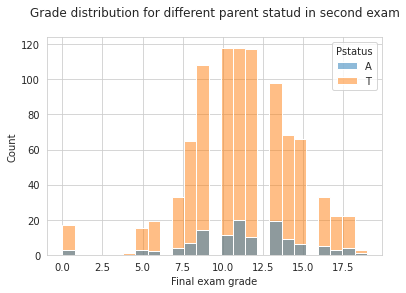

In [65]:
ax=sns.histplot(df,x='G2', hue='Pstatus')
ax.set_title("Grade distribution for different parent statud in second exam\n")
ax.set(xlabel="Final exam grade")

[Text(0.5, 0, 'Final exam grade')]

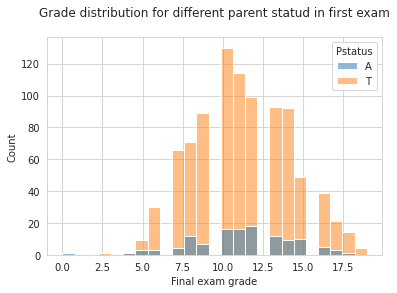

In [66]:
ax=sns.histplot(df,x='G1', hue='Pstatus')
ax.set_title("Grade distribution for different parent statud in first exam\n")
ax.set(xlabel="Final exam grade")

In [67]:
df.query("Pstatus== 'A'").G3.max(),df.query("Pstatus== 'A'").G2.max(),df.query("Pstatus== 'A'").G1.max()

(19, 19, 18)

In [68]:
df.query("Pstatus== 'T'").G3.max(),df.query("Pstatus== 'T'").G2.max(),df.query("Pstatus== 'T'").G1.max()

(20, 19, 19)

It's found that for students having their parent apart, we never find one with grade greater thatn 19 in any exam. but it might be due to randomness. as not big difference 

### 5.6 how does mother's and fathers' education affect student performance?

Education

1: primary education

2: 4th grade

3: secondary

4: high education

In [69]:
df_train_sum=df.copy(deep=True)
df_train_sum['sum_grades']=df_train_sum['G1']+df_train_sum['G2']+df_train_sum['G3']

[Text(0.5, 0, 'Grades for final')]

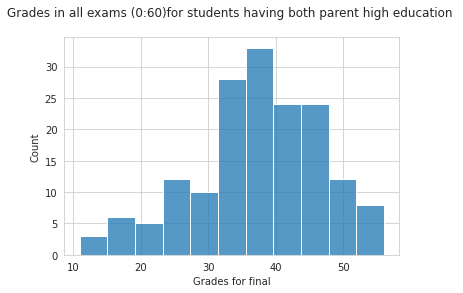

In [70]:
ax=sns.histplot(df_train_sum.query("Medu == 4 and Fedu ==4"),x='sum_grades')
ax.set_title("Grades in all exams (0:60)for students having both parent high education \n")
ax.set(xlabel="Grades for final")

In [71]:
df_train_sum.query("Medu == 4 and Fedu ==4")['sum_grades'].mean(),df_train_sum.query("Medu == 4 and Fedu ==4")['sum_grades'].median()

(37.127272727272725, 38.0)

we find out that most of students having their parets both of high education have high grades. their mean values it 39 out of 60

[Text(0.5, 0, 'Grades for final')]

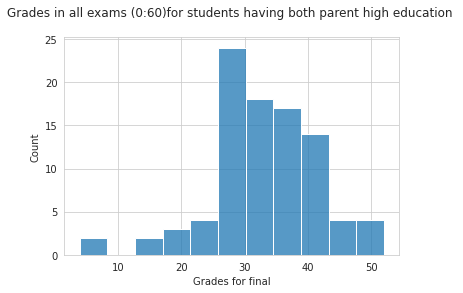

In [72]:
ax=sns.histplot(df_train_sum.query("Medu == 3 and Fedu ==3"),x='sum_grades')
ax.set_title("Grades in all exams (0:60)for students having both parent high education \n")
ax.set(xlabel="Grades for final")

In [73]:
df_train_sum.query("Medu == 3 and Fedu ==3")['sum_grades'].mean(),df_train_sum.query("Medu == 3 and Fedu ==3")['sum_grades'].median()

(32.96739130434783, 33.0)

when both parents are secondary school educated, student have average of 34 out of 60

[Text(0.5, 0, 'Grades for final')]

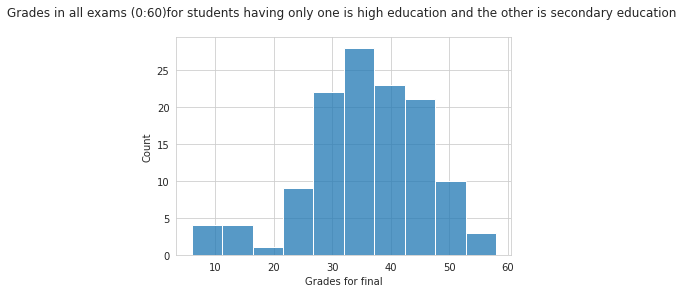

In [74]:
ax=sns.histplot(df_train_sum.query("(Medu == 3 and Fedu ==4) or (Medu == 4 and Fedu ==3)"),x='sum_grades')
ax.set_title("Grades in all exams (0:60)for students having only one is high education and the other is secondary education \n")
ax.set(xlabel="Grades for final")

In [75]:
df_train_sum.query("(Medu == 3 and Fedu ==4) or (Medu == 4 and Fedu ==3)")['sum_grades'].mean(),df_train_sum.query("(Medu == 3 and Fedu ==4) or (Medu == 4 and Fedu ==3)")['sum_grades'].median()

(35.856, 37.0)

if one of parents having high education, their average grade is 35 and median is 37, better if both are only secondary education

[Text(0.5, 0, 'Grades for final')]

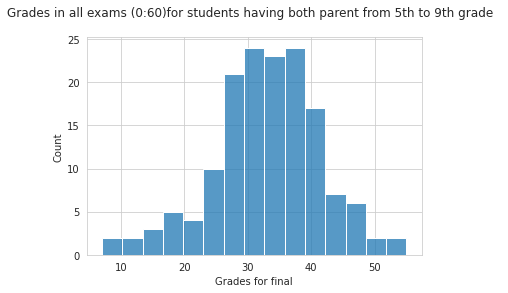

In [76]:
ax=sns.histplot(df_train_sum.query("Medu ==2 and Fedu ==2"),x='sum_grades')
ax.set_title("Grades in all exams (0:60)for students having both parent from 5th to 9th grade  \n")
ax.set(xlabel="Grades for final")

In [77]:
df_train_sum.query("Medu == 2 and Fedu ==2")['sum_grades'].mean(),df_train_sum.query("Medu == 3 and Fedu ==3")['sum_grades'].median()

(32.74342105263158, 33.0)

if both parent are from 5th to 9th grade, avg grade is 34

In [78]:
df_train_sum.query("(Medu == 1 or Medu == 0 )and (Fedu ==1 or Fedu ==0)")['sum_grades'].mean(),df_train_sum.query("Medu == 3 and Fedu ==3")['sum_grades'].median()

(30.136690647482013, 33.0)

when parent's had only primary educatoin, or none, avg grade for their students is 31, and median is 33

we can see huge differnce in sutdent performance based on parents education level. so we can conclude it's very important to have well educated parents to motivate children to study

### 5.7 if parents are apart; does it affect which guardian guard student in his grades?

In [79]:
df_apart=df.copy(deep=True).query("Pstatus == 'A'")
df_apart['sum_grades']=df_apart['G1']+df_apart['G2']+df_apart['G3']

[Text(0.5, 0, 'Grades for final')]

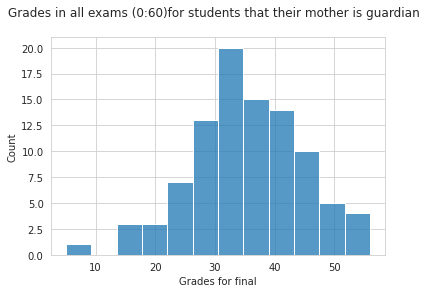

In [80]:
ax=sns.histplot(df_apart.query("guardian =='mother'"), x='sum_grades')
ax.set_title("Grades in all exams (0:60)for students that their mother is guardian  \n")
ax.set(xlabel="Grades for final")

In [81]:
df_apart.query("guardian =='mother'")['sum_grades'].mean(),df_apart.query("guardian =='mother'")['sum_grades'].median()

(35.05263157894737, 35.0)

is seems when they are apart, if mother is guardian, avg grade is good it's 35

[Text(0.5, 0, 'Grades for final')]

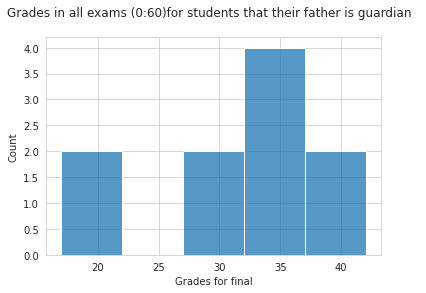

In [82]:
ax=sns.histplot(df_apart.query("guardian =='father'"), x='sum_grades')
ax.set_title("Grades in all exams (0:60)for students that their father is guardian  \n")
ax.set(xlabel="Grades for final")

In [83]:
df_apart.query("guardian =='father'")['sum_grades'].mean(),df_apart.query("guardian =='father'")['sum_grades'].median()

(31.0, 32.0)

and when the father is the gaurdian, they have less avg grade, mean =32.5

So we can conclude that mother as guardians can do better than fathers. this might be due to fathers working more hours than women

**Test hypothesis**

NULL both parent have same effect

**either there is something wrong or i don't understand p-value right**

In [84]:
mother_avg=df.query("guardian =='mother'").G3.mean()
sample_father=df.query("guardian =='father'").sample(200)
father_avg_grade=sample_father.G3.mean()
z=(father_avg_grade-mother_avg)/np.sqrt(sample_father.G3.var()/200)
p=sp.stats.norm.cdf(z)
print("p-value {}".format(p))

p-value 0.8818838281521283


### 5.8 if a student's home is far away from school, does that affect student's performance?

In [85]:
df_train_t1=df.copy(deep=True).query("traveltime == 1")
df_train_t1['sum_grades']=df_train_t1['G1']+df_train_t1['G2']+df_train_t1['G3']

[Text(0.5, 0, 'Summation of all grades in all exams')]

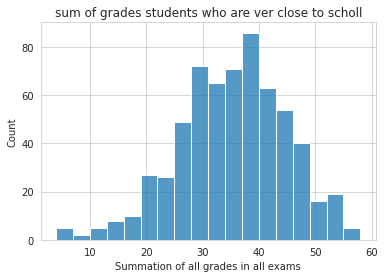

In [86]:
ax=sns.histplot(df_train_t1, x='sum_grades')
ax.set_title("sum of grades students who are ver close to scholl")
ax.set(xlabel="Summation of all grades in all exams")

In [87]:
df_train_t1['sum_grades'].mean(),df_train_t1['sum_grades'].median()

(34.68860353130016, 35.0)

when they are close to school, they have avg grade 36. but ther are somer weird outliers. there are some students wil very low travel time but still have 0 in exams

[Text(0.5, 0, 'Summation of all grades in all exams for who they take more than one hour in travel time')]

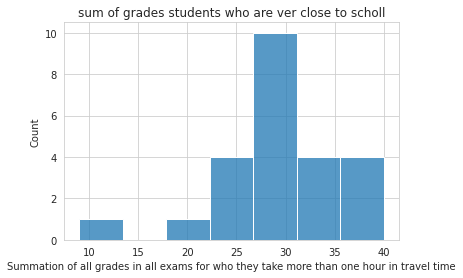

In [88]:
df_train_t4=df.copy(deep=True).query("traveltime == 4")
df_train_t4['sum_grades']=df_train_t4['G1']+df_train_t4['G2']+df_train_t4['G3']

ax=sns.histplot(df_train_t4, x='sum_grades')
ax.set_title("sum of grades students who are ver close to scholl")
ax.set(xlabel="Summation of all grades in all exams for who they take more than one hour in travel time")


In [89]:
df_train_t4['sum_grades'].mean(),df_train_t4['sum_grades'].median()

(29.291666666666668, 29.0)

and for students having more than one hour, they  29 avg grades

so we can conclude that traveltime affect student performance. and if they are new to school they can performa much better

### 5.9 how does family size affect student performace?

[Text(0.5, 0, 'final exam grade')]

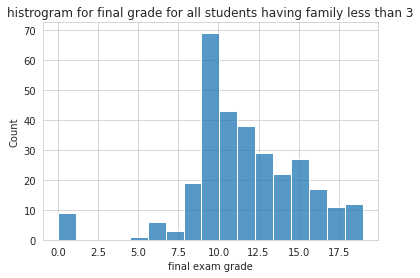

In [90]:
df_train_le3=df.query("famsize == 'LE3'")

ax=sns.histplot(df_train_le3,x='G3')
ax.set_title("histrogram for final grade for all students having family less than 3")
ax.set(xlabel="final exam grade")


In [91]:
df_train_le3['G3'].mean(),df_train_le3['G3'].median()

(11.709150326797385, 12.0)

[Text(0.5, 0, 'final exam grade')]

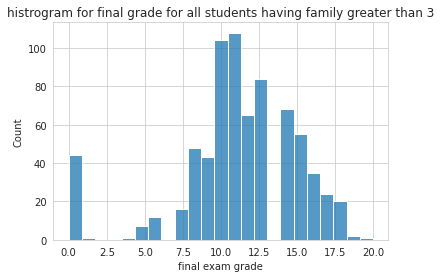

In [92]:
df_train_gt3=df.query("famsize == 'GT3'")

ax=sns.histplot(df_train_gt3,x='G3')
ax.set_title("histrogram for final grade for all students having family greater than 3")
ax.set(xlabel="final exam grade")

In [93]:
df_train_gt3['G3'].mean(),df_train_gt3['G3'].median()

(11.18970189701897, 11.0)

their average and median is very close actally. so no effects

### 5.10 how many hours (in study time) should students have to get grades greater than half? and greater than average?

In [94]:
half_grade=10
avg_grade=df['G3'].mean()
avg_grade

11.341954022988507

In [95]:
df_abv_half=df.query("G3 >= {}".format(half_grade))
df_abv_avg=df.query("G3 >= {}".format(avg_grade))
df_abv_19=df.query("G3 >= {}".format(19))

[Text(0.5, 0, 'study time')]

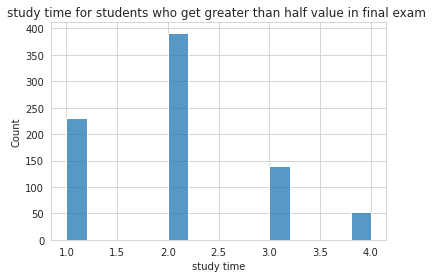

In [96]:
ax=sns.histplot(df_abv_half,x='studytime')
ax.set_title("study time for students who get greater than half value in final exam ")
ax.set(xlabel="study time")

[Text(0.5, 0, 'study time')]

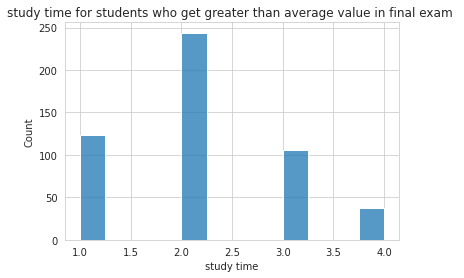

In [97]:
ax=sns.histplot(df_abv_avg,x='studytime')
ax.set_title("study time for students who get greater than average value in final exam ")
ax.set(xlabel="study time")

[Text(0.5, 0, 'study time')]

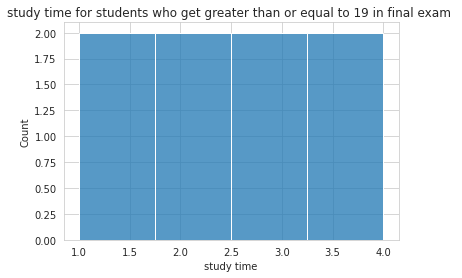

In [98]:
ax=sns.histplot(df_abv_19,x='studytime')
ax.set_title("study time for students who get greater than or equal to 19 in final exam ")
ax.set(xlabel="study time")


In [99]:
df_abv_half.studytime.mean(),df_abv_half.studytime.median()

(2.018427518427518, 2.0)

In [100]:
df_abv_avg.studytime.mean(),df_abv_avg.studytime.median()

(2.111764705882353, 2.0)

In [101]:
df_abv_19.studytime.mean(),df_abv_19.studytime.median()

(2.5, 2.5)

we see here it takes about 2 hours to get grades greater than half, but from distribution above, we can say that are more people having study time up to 4.5 to just get greater than half or greater than average

but it's really clear that if they want ot get high graded for like greater thatn or equal to 19, mean value of study time in 2.5 hours

but for having graded greater than 19, it might take some students more thatn 5 hours just to get the same grade

### 5.11 is it necessary to have family support in education to get grades greater than average or greater than half?

[Text(0.5, 0, 'family support')]

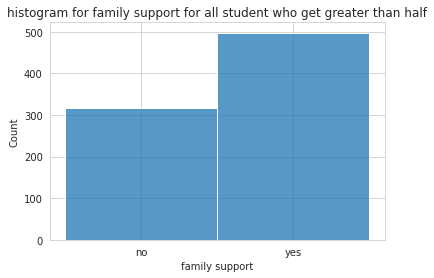

In [102]:
ax=sns.histplot(df_abv_half, x='famsup')
ax.set_title("histogram for family support for all student who get greater than half")
ax.set(xlabel="family support")


[Text(0.5, 0, 'family support')]

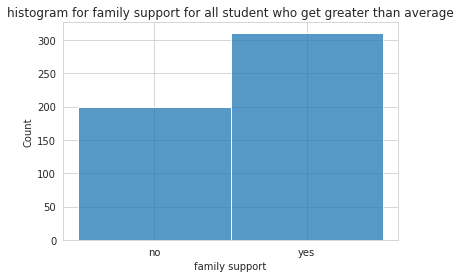

In [103]:
ax=sns.histplot(df_abv_avg, x='famsup')
ax.set_title("histogram for family support for all student who get greater than average")
ax.set(xlabel="family support")


In [104]:
df_below_half=df[~df.index.isin(df_abv_half.index)]

[Text(0.5, 0, 'family support')]

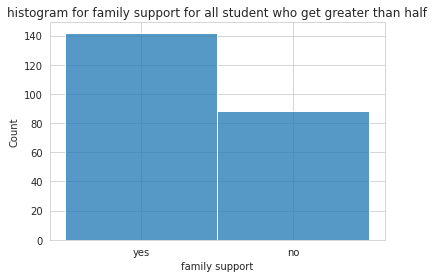

In [105]:
ax=sns.histplot(df_below_half, x='famsup')
ax.set_title("histogram for family support for all student who get greater than half")
ax.set(xlabel="family support")


[Text(0.5, 0, 'family support')]

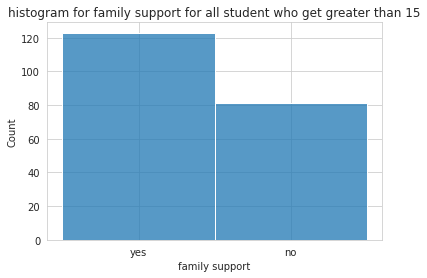

In [106]:
df_abv_15=df.query("G3 >= {}".format(15))
ax=sns.histplot(df_abv_15, x='famsup')
ax.set_title("histogram for family support for all student who get greater than 15")
ax.set(xlabel="family support")


We see majority of people having high grades greater than half of greater than average, are having family support. 

although it's not impossible to have good grades witout it as indicated by the graph above.

### 5.12 do extra activities put more burden on students? can they also get a high grade while they do them?

[Text(0.5, 0, 'family support')]

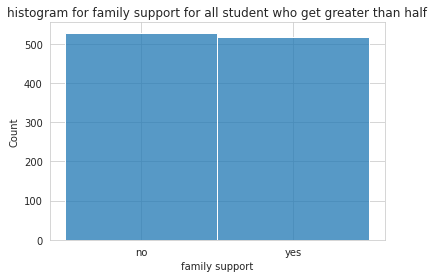

In [107]:
ax=sns.histplot(df, x='activities')
ax.set_title("histogram for family support for all student who get greater than half")
ax.set(xlabel="family support")


totally balances

In [108]:
df_act=df.query("activities == 'yes'")

[Text(0.5, 0, 'Final grade')]

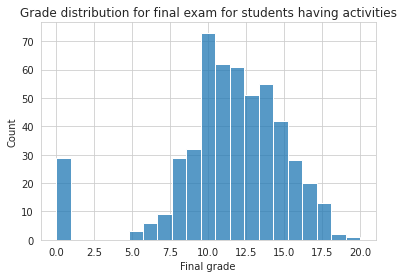

In [109]:
ax=sns.histplot(df_act, x='G3')
ax.set_title("Grade distribution for final exam for students having activities")
ax.set(xlabel="Final grade")


[Text(0.5, 0, 'second exam grades')]

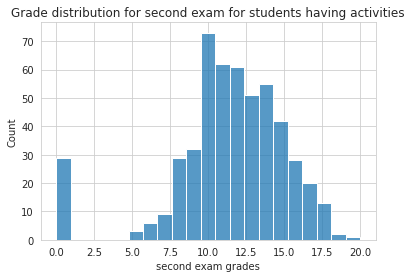

In [110]:
ax=sns.histplot(df_act, x='G3')
ax.set_title("Grade distribution for second exam for students having activities")
ax.set(xlabel="second exam grades")

[Text(0.5, 0, 'first exam grades')]

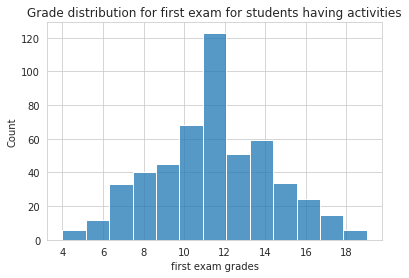

In [111]:
ax=sns.histplot(df_act, x='G1')
ax.set_title("Grade distribution for first exam for students having activities")
ax.set(xlabel="first exam grades")


In [112]:
df_act.G3.mean(),df_act.G2.mean(),df_act.G1.mean(),

(11.474806201550388, 11.432170542635658, 11.418604651162791)

In [113]:
df_no_act=df[~df.index.isin(df_act.index)]

[Text(0.5, 0, 'final exam grades')]

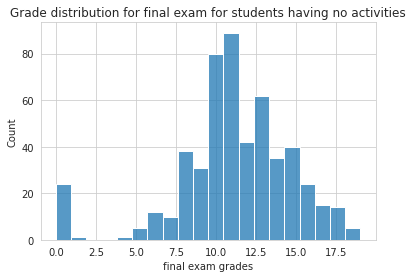

In [114]:
ax=sns.histplot(df_no_act, x='G3')
ax.set_title("Grade distribution for final exam for students having no activities")
ax.set(xlabel="final exam grades")

[Text(0.5, 0, 'second exam grades')]

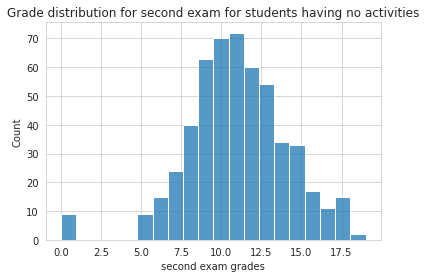

In [115]:
ax=sns.histplot(df_no_act, x='G2')
ax.set_title("Grade distribution for second exam for students having no activities")
ax.set(xlabel="second exam grades")

[Text(0.5, 0, 'first exam grades')]

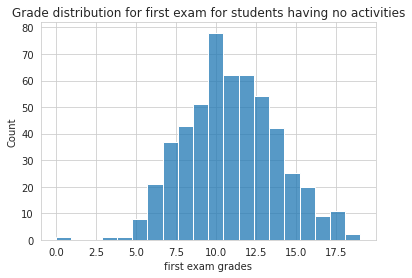

In [116]:
ax=sns.histplot(df_no_act, x='G1')
ax.set_title("Grade distribution for first exam for students having no activities")
ax.set(xlabel="first exam grades")

In [117]:
df_no_act.G3.mean(),df_no_act.G2.mean(),df_no_act.G1.mean(),

(11.212121212121213, 11.06439393939394, 11.013257575757576)

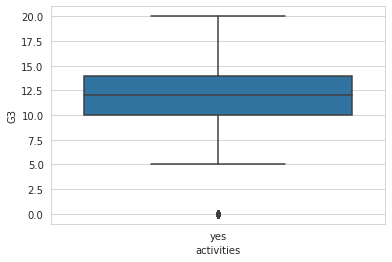

In [118]:
ax = sns.boxplot(x="activities", y="G3", data=df_act)

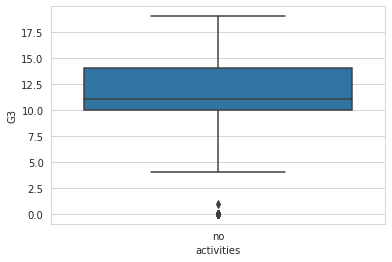

In [119]:
ax = sns.boxplot(x="activities", y="G3", data=df_no_act)

we see here both kinds either doing activites or not are having the same distribution, and the same mean value. we can infer that doing activities do not affect student performance vey badly.

student performance cannot be determined by their activities 

**Test hypothese**
 both having same avg mean


In [120]:
no_act_mean=df.query("activities =='no'").G3.mean()
sample_act=df.query("activities =='yes'").sample(150)
act_avg_grade=sample_act.G3.mean()
z=(act_avg_grade-no_act_mean)/np.sqrt(df.G3.var()/400)
p=sp.stats.norm.cdf(z)
print("p-value {}".format(p))

p-value 0.03421245322786006


we can simply accept our null hypotheses, that both have same average grade

### 5.13 Is grades affected by romantic relationships?

**Test hypotesis**

Null: both having relationship or not, have the same mean

In [121]:
no_rel_mean=df.query("romantic =='no'").G3.mean()
sample_rel=df.query("romantic =='yes'").sample(250)
rel_avg_grade=sample_rel.G3.mean()
z=(rel_avg_grade-no_rel_mean)/np.sqrt(df.G3.var()/250)
p=sp.stats.norm.cdf(z)
print("p-value {}".format(p))

p-value 0.0002769819980245553


we will absolutly reject our null hypothese. and they are totally related

[Text(0.5, 0, 'final exam grades')]

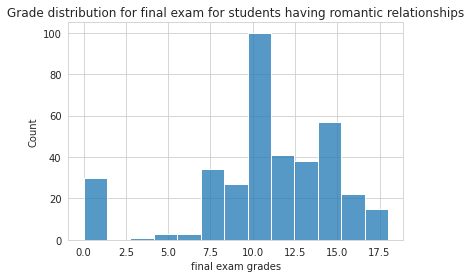

In [122]:
ax=sns.histplot(df.query("romantic == 'yes'"), x='G3')
ax.set_title("Grade distribution for final exam for students having romantic relationships")
ax.set(xlabel="final exam grades")

In [123]:
df.query("romantic == 'yes'").G3.mean(),df.query("romantic == 'yes'").G3.median()

(10.830188679245284, 11.0)

[Text(0.5, 0, 'final exam grades')]

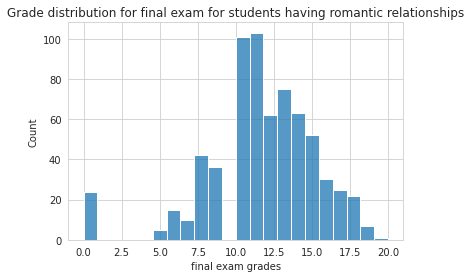

In [124]:
ax=sns.histplot(df.query("romantic == 'no'"), x='G3')
ax.set_title("Grade distribution for final exam for students having romantic relationships")
ax.set(xlabel="final exam grades")

In [125]:
df.query("romantic == 'no'").G3.mean(),df.query("romantic == 'no'").G3.median()

(11.62407132243685, 12.0)

we can infer that romantic relations and grades and negativly corelated.

### 5.14 Is grades affected by alcohol?

[Text(0.5, 0, 'final exam grades')]

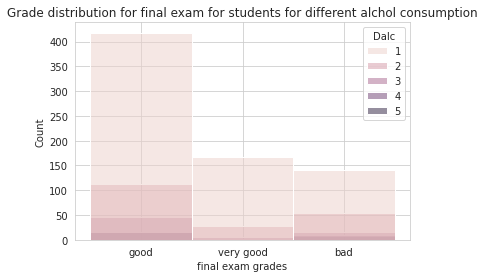

In [126]:
ax=sns.histplot(df_disc, x='final_grade', hue='Dalc')
ax.set_title("Grade distribution for final exam for students for different alchol consumption")
ax.set(xlabel="final exam grades")

**Test hypotesis**

Null: both having alchol or not have same avg

In [127]:
no_alc_mean=df.query("Dalc ==1").G3.mean()
sample_alc=df.query("Dalc > 1").sample(250)
alc_avg_grade=sample_alc.G3.mean()
z=(alc_avg_grade-no_alc_mean)/np.sqrt(df.G3.var()/250)
p=sp.stats.norm.cdf(z)
print("p-value {}".format(p))

p-value 2.983826292968942e-07


**probably something wrong**

we can infer that they are related. and as student used less alchol they get better grades.

Null hpotheses: no relation between alcohol consumption and grades

### 5.15 is wanting to go to high school enough motivation to get high grades?

[Text(0.5, 0, 'Do students want to go to high school?')]

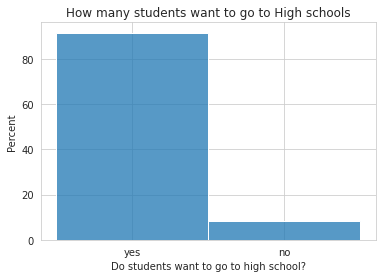

In [128]:
ax=sns.histplot(df,x='higher',stat='percent')
ax.set_title("How many students want to go to High schools")
ax.set(xlabel='Do students want to go to high school?')

about 85 percent of our dataset want to go to high school

In [129]:
df.query("higher=='yes'").G3.mean(),df.query("higher=='yes'").G3.median()

(11.620942408376964, 12.0)

In [130]:
df.query("higher=='no'").G3.mean(),df.query("higher=='no'").G3.median()

(8.348314606741573, 9.0)

yes they are different, but because unbalanced data we cannot infer that their averge value must be differrnt

**Test hypothese**

Null hypothese: avg G3 for students wanting to go to higher or not are equal

In [131]:
yes_mean=df.query("higher=='yes'").G3.mean()
sample_no=df.query("higher=='no'").sample(50)
no_avg_grade=sample_no.G3.mean()
z=(no_avg_grade-yes_mean)/np.sqrt(df.G3.var()/100)
p=sp.stats.norm.cdf(z)
print("p-value {}".format(p))

p-value 1.3884386997029779e-12


it's absolutely less thatn 5%, so it's not due to randomness, so we can infer that they have differnt average grades.

we it's pretty great to motiviate you children to seek for high school. it's pretty good motivatin.

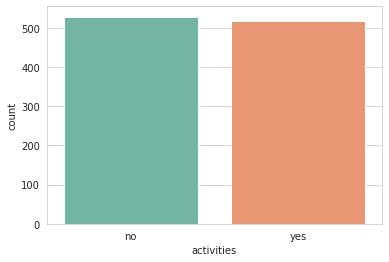

In [132]:
sns.countplot(x='activities', data=df, palette='Set2')
plt.show()

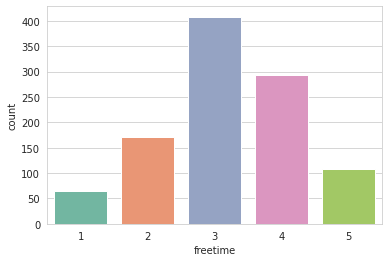

In [133]:
sns.countplot(x='freetime', data=df, palette='Set2')
plt.show()

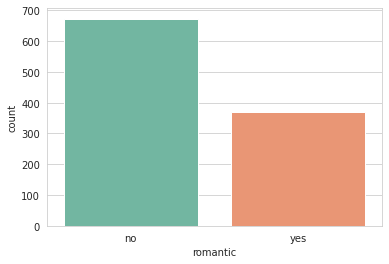

In [134]:
sns.countplot(x='romantic', data=df, palette='Set2')
plt.show()

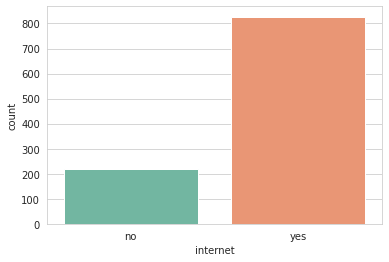

In [135]:
sns.countplot(x='internet', data=df, palette='Set2')
plt.show()

# 6.0 Extra cleaning for modeling

In [140]:
df_train, df_test=train_test_split(df, test_size=0.2)
df_train.shape, df_test.shape

((835, 33), (209, 33))

In [221]:
df_train.head()

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GP,MS,is_male,is_female,R,U,both_educated_high,both_not_educated,one_educated_high,both_at_home,only_one_working,both_working,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,course,home,other,reputation,is_guardian_mo,is_school_supporting,is_family_supporting,is_paid
877,18,0,1,0,0,4,2,0,1,1,1,1,1,4,3,2,4,5,3,14,10,8,9,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,2,1,1,1
847,17,1,1,0,0,2,1,1,0,1,1,1,0,4,2,4,2,3,2,24,18,18,18,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,2,0,1,0
504,19,0,1,0,0,1,3,0,0,1,1,1,1,5,4,5,1,1,1,0,12,13,13,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0
483,16,1,1,0,0,3,2,0,0,1,0,1,0,3,4,5,1,2,1,1,9,10,11,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
51,15,0,1,0,0,1,2,0,0,1,1,1,0,4,3,3,1,1,5,0,16,14,16,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2,0,1,0



we want to generalize our result for all schools, so we won't insert column school in our analysis

In [142]:
df_train[['GP','MS']]=pd.get_dummies(df_train['school'])
df_test[['GP','MS']]=pd.get_dummies(df_test['school'])

df_train.drop(['school'], axis=1, inplace=True)
df_test.drop(['school'], axis=1, inplace=True)



In [143]:
df_train['is_male']=df_train['sex'].apply(lambda x: 1 if x =='M' else 0)
df_test['is_male']=df_test['sex'].apply(lambda x: 1 if x =='M' else 0)

df_train['is_female']=df_train['sex'].apply(lambda x: 0 if x =='M' else 1)
df_test['is_female']=df_test['sex'].apply(lambda x: 0 if x =='M' else 1)

df_train.drop(['sex'], axis=1, inplace=True)
df_test.drop(['sex'], axis=1, inplace=True)

In [144]:
# Address we found that if it's rural they have better grades
df_train[['R','U']]=pd.get_dummies(df_train['address'])
df_test[['R','U']]=pd.get_dummies(df_test['address'])
df_train.drop(['address'], axis=1, inplace=True)
df_test.drop(['address'], axis=1, inplace=True)

In [145]:
## famsize, it was found it does not affect final output so
df_train['famsize']=df_train['famsize'].apply(lambda x:1 if x=='GT3' else 0)
df_test['famsize']=df_test['famsize'].apply(lambda x:1 if x=='GT3' else 0)

In [146]:
#Pstatus, we found that pstatus is affecting their performace, and we will consider they ordinal
df_train['Pstatus']=df_train['Pstatus'].apply(lambda x: 1 if x=="T" else 0)
df_test['Pstatus']=df_test['Pstatus'].apply(lambda x: 1 if x=="T" else 0)

In [164]:
#Medu we can't let the model see the differnce between none  and  primary as same as difference between secondary and high school
#Pstatus, we found that pstatus is affecting their performace, and we will consider they ordinal
df_train['Medu']=df_train['Medu'].apply(lambda x: 20 if x==3 else(10 if x==2 else (4 if x==1 else 0)))
df_test['Medu']=df_test['Medu'].apply(lambda x: 20 if x==3 else(10 if x==2 else (4 if x==1 else 0)))

df_train['Fedu']=df_train['Fedu'].apply(lambda x: 20 if x==3 else(10 if x==2 else (4 if x==1 else 0)))
df_test['Fedu']=df_test['Fedu'].apply(lambda x: 20 if x==3 else(10 if x==2 else (4 if x==1 else 0)))

df_train['both_educated_high']=(((df_train.Fedu==4)|(df_train.Fedu==3))&((df_train.Medu==4)|(df_train.Medu==3))).apply(lambda x: 1 if x else 0)
df_test['both_educated_high']=(((df_test.Fedu==4)|(df_test.Fedu==3))&((df_test.Medu==4)|(df_test.Medu==3))).apply(lambda x: 1 if x else 0)

df_train['both_not_educated']=(((df_train.Fedu==0)|(df_train.Fedu==1))&((df_train.Medu==0)|(df_train.Medu==1))).apply(lambda x: 1 if x else 0)
df_test['both_not_educated']=(((df_test.Fedu==0)|(df_test.Fedu==1))&((df_test.Medu==0)|(df_test.Medu==1))).apply(lambda x: 1 if x else 0)

df_train['one_educated_high']=(((df_train.Fedu==4)|(df_train.Fedu==3))|((df_train.Medu==4)|(df_train.Medu==3))).apply(lambda x: 1 if x else 0)
df_test['one_educated_high']=(((df_test.Fedu==4)|(df_test.Fedu==3))|((df_test.Medu==4)|(df_test.Medu==3))).apply(lambda x: 1 if x else 0)


In [148]:
#eduaction
df_train['both_at_home']=((df_train['Mjob']=="at_home")& (df_train['Fjob']=="at_home")).apply(lambda x: 1 if x else 0)
df_train['only_one_working']=(((df_train['Mjob']=="at_home") & (df_train['Fjob']!="at_home"))|((df_train['Mjob']!="at_home") & (df_train['Fjob']=="at_home"))).apply(lambda x: 1 if x else 0)
df_train['both_working']=((df_train['Mjob']!="at_home")& (df_train['Fjob']!="at_home")).apply(lambda x: 1 if x else 0)

df_test['both_at_home']=(df_test['Mjob']=="at_home")& (df_test['Fjob']=="at_home").apply(lambda x: 1 if x else 0)
df_test['only_one_working']=(((df_test['Mjob']=="at_home") & (df_test['Fjob']!="at_home"))|((df_test['Mjob']!="at_home") & (df_test['Fjob']=="at_home"))).apply(lambda x: 1 if x else 0)
df_test['both_working']=((df_test['Mjob']!="at_home")& (df_test['Fjob']!="at_home")).apply(lambda x: 1 if x else 0)

df_train[['M_at_home','M_health','M_other','M_services','M_teacher']]=pd.get_dummies(df_train['Mjob'], prefix='M')
df_train[['F_at_home','F_health','F_other','F_services','F_teacher']]=pd.get_dummies(df_train['Fjob'], prefix='F')

df_test[['M_at_home','M_health','M_other','M_services','M_teacher']]=pd.get_dummies(df_test['Mjob'], prefix='M')
df_test[['F_at_home','F_health','F_other','F_services','F_teacher']]=pd.get_dummies(df_test['Fjob'], prefix='F')

df_train.drop(['Mjob','Fjob'],axis=1,inplace=True)
df_test.drop(['Mjob','Fjob'],axis=1,inplace=True)


In [149]:
#reason we will drop it to generalize
df_train[['course','home','other','reputation']]=pd.get_dummies(df_train['reason'])
df_test[['course','home','other','reputation']]=pd.get_dummies(df_test['reason'])
df_train.drop(['reason'],axis=1,inplace=True)
df_test.drop(['reason'],axis=1,inplace=True)

In [150]:
#guardian, as mother are better guardian i make bigger differnce between them
df_train['is_guardian_mo']=df_train['guardian'].apply(lambda x:2 if x=='mother' else 0)
df_train.drop(['guardian'],axis=1,inplace=True)

df_test['is_guardian_mo']=df_test['guardian'].apply(lambda x:2 if x=='mother' else 0)
df_test.drop(['guardian'],axis=1,inplace=True)

In [151]:
#schoolsup
df_train['is_school_supporting']=df_train['schoolsup'].apply(lambda x:1 if x=='yes' else 0)
df_test['is_school_supporting']=df_test['schoolsup'].apply(lambda x:1 if x=='yes' else 0)
df_train.drop(['schoolsup'],axis=1,inplace=True)
df_test.drop(['schoolsup'],axis=1,inplace=True)

In [152]:
#family support
df_train['is_family_supporting']=df_train['famsup'].apply(lambda x:1 if x=='yes' else 0)
df_test['is_family_supporting']=df_test['famsup'].apply(lambda x:1 if x=='yes' else 0)
df_train.drop(['famsup'],axis=1,inplace=True)
df_test.drop(['famsup'],axis=1,inplace=True)

In [153]:
#paid
df_train['is_paid']=df_train['paid'].apply(lambda x:1 if x=='yes' else 0)
df_test['is_paid']=df_test['paid'].apply(lambda x:1 if x=='yes' else 0)
df_train.drop(['paid'],axis=1,inplace=True)
df_test.drop(['paid'],axis=1,inplace=True)

In [154]:
#we don't want to no acitivities and no acitivtes as the same differenct
df_train['activities']=df_train['activities'].apply(lambda x:1 if x=='yes' else 0)
df_test['activities']=df_test['activities'].apply(lambda x:1 if x=='yes' else 0)


In [155]:
#nursery
df_train['nursery']=df_train['nursery'].apply(lambda x:1 if x=='yes' else 0)
df_test['nursery']=df_test['nursery'].apply(lambda x:1 if x=='yes' else 0)

In [156]:
#wants to have higher education?
df_train['higher']=df_train['higher'].apply(lambda x:1 if x=='yes' else 0)
df_test['higher']=df_test['higher'].apply(lambda x:1 if x=='yes' else 0)

In [157]:
#internet
df_train['internet']=df_train['internet'].apply(lambda x:1 if x=='yes' else 0)
df_test['internet']=df_test['internet'].apply(lambda x:1 if x=='yes' else 0)

In [158]:
#romantic
df_train['romantic']=df_train['romantic'].apply(lambda x:1 if x=='yes' else 0)
df_test['romantic']=df_test['romantic'].apply(lambda x:1 if x=='yes' else 0)

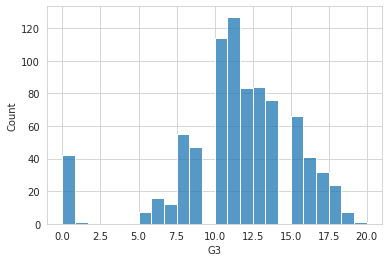

In [159]:
sns.histplot(df_train,x='G3')

In [217]:
df_unskweed_train=df_train.copy(deep=True)

z_scores = stats.zscore(df_unskweed_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_unskweed_train = df_unskweed_train[filtered_entries]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning:

invalid value encountered in true_divide



In [218]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [ ]:
filtered_entries

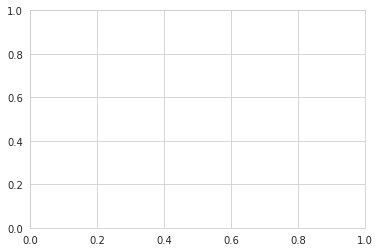

In [220]:
sns.histplot(df_unskweed_train,x='G3')

In [168]:
## as it's left skewed let's try square transformation
df_square_train=df_train.copy(deep=True)
df_square_train['G3']=df_square_train['G3']**2

df_square_test=df_test.copy(deep=True)
df_square_test['G3']=df_square_test['G3']**2

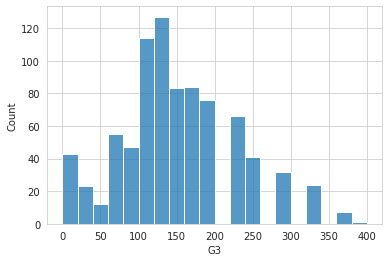

In [169]:
sns.histplot(df_square_train,x='G3')

### 6.1 Cleaning after making everything numerical

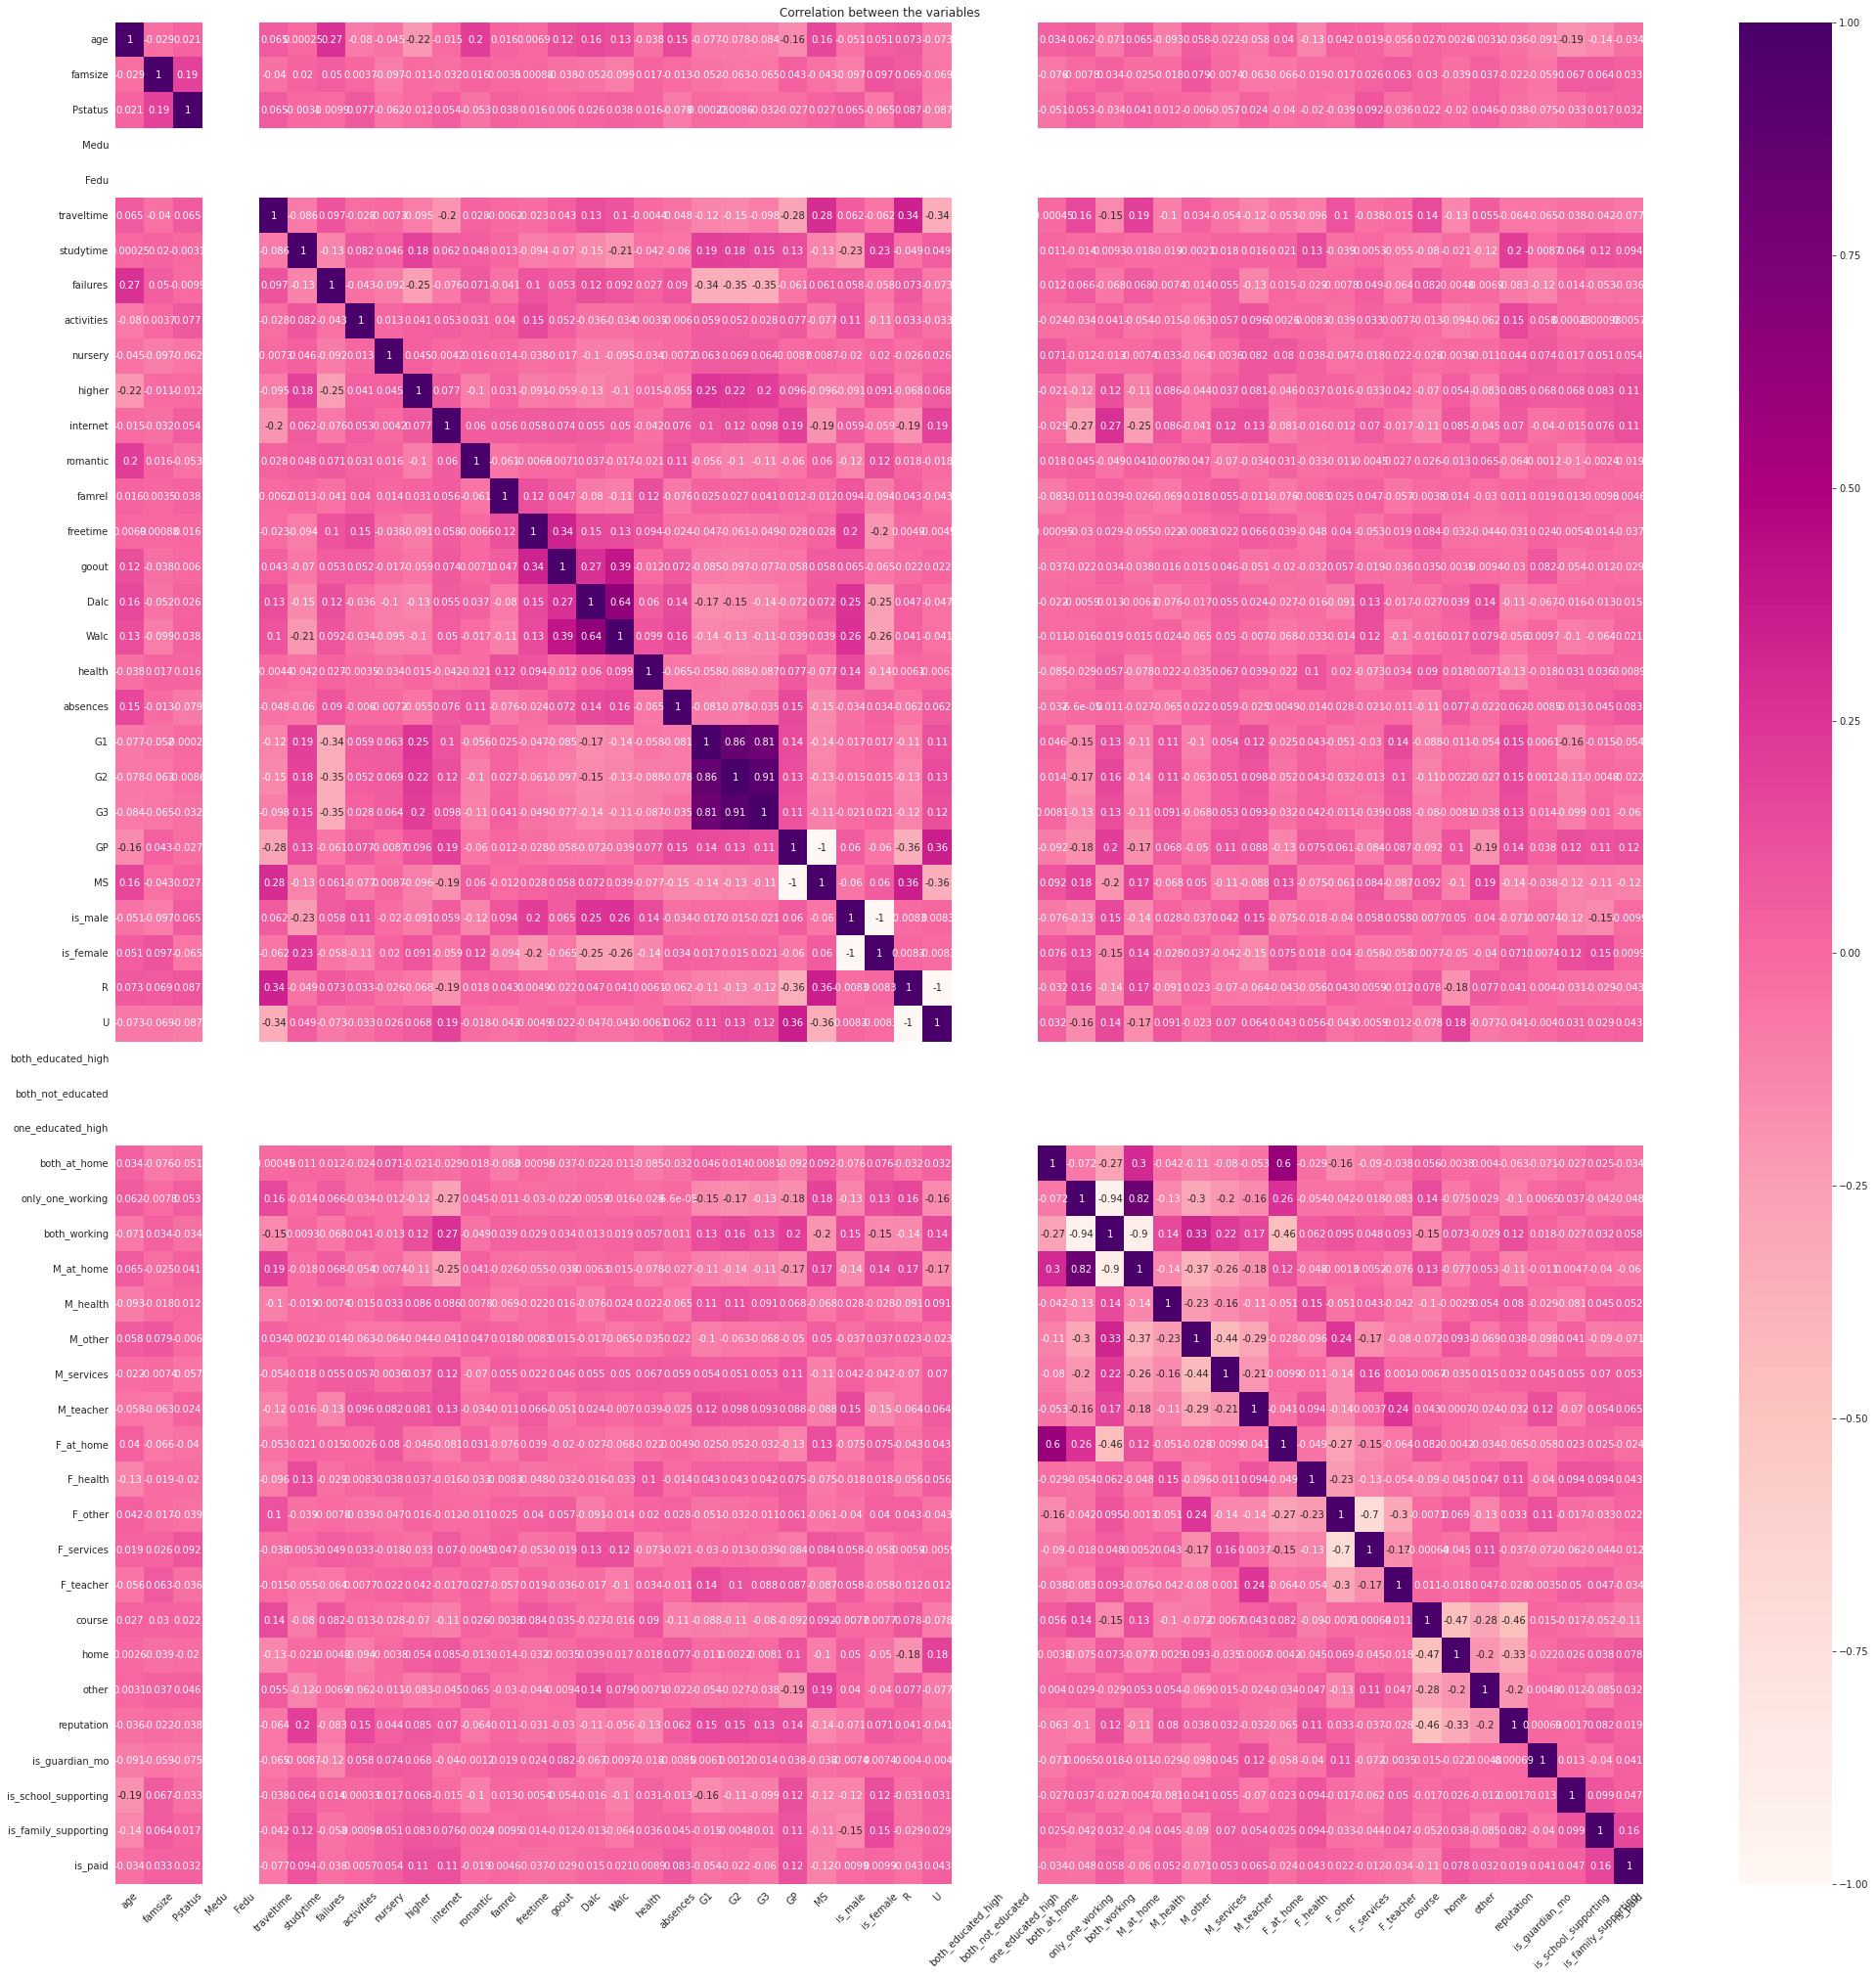

In [227]:
fig, ax = plt.subplots(figsize=(35,35))         # Sample figsize in inches
sns.heatmap(df_train.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

In [228]:
corr=df_train.corr()

In [237]:
corr['G3'].sort_values(ascending=False)[:20]

G3                1.000000
G2                0.910417
G1                0.808259
higher            0.201710
studytime         0.149064
both_working      0.127158
reputation        0.127027
U                 0.119288
GP                0.106854
internet          0.098183
M_teacher         0.092909
M_health          0.090678
F_teacher         0.088379
nursery           0.064372
M_services        0.052845
F_health          0.042304
famrel            0.040728
activities        0.028198
is_female         0.021344
is_guardian_mo    0.014342
Name: G3, dtype: float64

In [236]:
corr['G3'].sort_values(ascending=True)[:20]

failures               -0.350698
Dalc                   -0.136823
only_one_working       -0.134704
R                      -0.119288
M_at_home              -0.113939
romantic               -0.112955
Walc                   -0.111697
MS                     -0.106854
is_school_supporting   -0.099127
traveltime             -0.097760
health                 -0.087132
age                    -0.084125
course                 -0.080098
goout                  -0.076772
M_other                -0.068082
famsize                -0.065118
is_paid                -0.059846
freetime               -0.049113
F_services             -0.038982
other                  -0.038432
Name: G3, dtype: float64

Really important: 
in postivie

G2, G1, higher, studytime, both_working, reputation, U, GP, internet, M_teacher, M_health, F_teacher. 

in negative

failures, Dalc, only_one_working, R, M_at_home, romantic, walc, Ms, is_school_supporting, travel_time


In [241]:
cols_chosed=corr['G3'].sort_values(ascending=False)[:10].index.to_list()+corr['G3'].sort_values(ascending=True)[:10].index.to_list()
cols_chosed

['G3',
 'G2',
 'G1',
 'higher',
 'studytime',
 'both_working',
 'reputation',
 'U',
 'GP',
 'internet',
 'failures',
 'Dalc',
 'only_one_working',
 'R',
 'M_at_home',
 'romantic',
 'Walc',
 'MS',
 'is_school_supporting',
 'traveltime']

In [242]:
df_train_clean=df_train[cols_chosed]
df_test_clean=df_test[cols_chosed]

In [243]:
df_test_clean.sample()

,G3,G2,G1,higher,studytime,both_working,reputation,U,GP,internet,failures,Dalc,only_one_working,R,M_at_home,romantic,Walc,MS,is_school_supporting,traveltime
18,7,8,8,1,1,1,0,1,1,1,3,2,0,0,0,0,4,0,0,1


### 6.2 PCA

In [287]:
all_df=pd.concat((df_train, df_test))

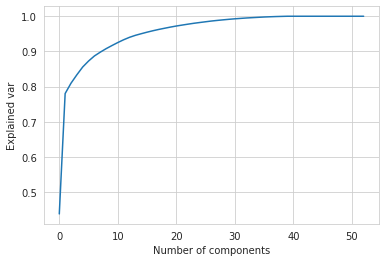

In [288]:
pca_com=53
pca=PCA(n_components=len(all_df.columns))
X=pca.fit_transform(all_df)
explained_variance=pca.explained_variance_ratio_
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel("Explained var")
plt.show()

In [289]:
pca_com=35
pca=PCA(n_components=pca_com)
X=pca.fit_transform(all_df)

In [291]:
Var_matrix =(pd.concat([pd.DataFrame(list(all_df.columns), columns=["Factors"] ) ,pd.DataFrame(list(explained_variance**2), columns=["^2 Variance"] )] , axis=1).sort_values(by='^2 Variance', ascending = False)[0:pca_com])

list(Var_matrix['Factors']) 
all_df = all_df[list(Var_matrix['Factors'])]

all_df.dtypes

age                   int64
famsize               int64
Pstatus               int64
Medu                  int64
Fedu                  int64
traveltime            int64
studytime             int64
failures              int64
activities            int64
nursery               int64
higher                int64
internet              int64
romantic              int64
famrel                int64
freetime              int64
goout                 int64
Dalc                  int64
Walc                  int64
health                int64
absences              int64
G1                    int64
G2                    int64
G3                    int64
GP                    uint8
MS                    uint8
is_male               int64
is_female             int64
R                     uint8
U                     uint8
both_educated_high    int64
both_not_educated     int64
one_educated_high     int64
both_at_home          int64
only_one_working      int64
both_working          int64
dtype: object

In [292]:
df_train_pca, df_test_pca=train_test_split(all_df, test_size=0.2)
df_train_pca.shape, df_test_pca.shape

((835, 35), (209, 35))

In [510]:
df_disc_train=df_train.copy(deep=True)
df_disc_test=df_test.copy(deep=True)

df_disc_train['final_grade'] = 'na'

df_disc_train.loc[(df_disc_train.G3 >= 15) & (df_disc_train.G3 <= 20), 'final_grade'] = 2
df_disc_train.loc[(df_disc_train.G3 >= 10) & (df_disc_train.G3 <= 14), 'final_grade'] = 1
df_disc_train.loc[(df_disc_train.G3 >= 0) & (df_disc_train.G3 <= 9), 'final_grade'] = 0

df_disc_test['final_grade'] = 'na'
df_disc_test.loc[(df_disc_test.G3 >= 15) & (df_disc_test.G3 <= 20), 'final_grade'] = 2
df_disc_test.loc[(df_disc_test.G3 >= 10) & (df_disc_test.G3 <= 14), 'final_grade'] = 1
df_disc_test.loc[(df_disc_test.G3 >= 0) & (df_disc_test.G3 <= 9), 'final_grade'] = 0


In [512]:
df_disc_test.head(20)

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GP,MS,is_male,is_female,R,U,both_educated_high,both_not_educated,one_educated_high,both_at_home,only_one_working,both_working,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,course,home,other,reputation,is_guardian_mo,is_school_supporting,is_family_supporting,is_paid,final_grade
544,17,0,1,0,0,2,1,0,1,1,1,0,1,5,1,2,3,3,5,2,12,11,12,0,1,1,0,1,0,0,1,0,False,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
117,16,1,1,0,0,2,1,0,1,1,1,1,0,5,4,2,1,1,5,6,14,14,15,1,0,1,0,0,1,0,1,0,False,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2
522,16,1,1,0,0,1,2,0,0,1,1,1,1,4,3,4,1,2,3,4,8,8,8,0,1,0,1,0,1,0,1,0,False,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2,0,1,0,0
92,16,0,1,0,0,1,2,0,0,1,1,0,0,3,3,3,2,3,2,0,12,13,12,1,0,0,1,0,1,0,1,0,False,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1
799,18,0,1,0,0,1,1,3,0,1,0,1,1,2,3,5,2,5,4,0,6,5,0,1,0,1,0,0,1,0,1,0,False,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0
642,17,1,1,0,0,2,2,0,0,1,1,1,0,5,5,4,1,1,1,0,6,9,11,0,1,0,1,0,1,0,1,0,False,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,2,0,0,0,1
229,17,0,1,0,0,2,2,0,0,1,1,1,0,4,4,4,1,3,1,2,14,16,15,1,0,0,1,0,1,0,1,0,False,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,2
231,18,0,1,0,0,1,2,0,0,1,1,1,0,3,2,4,2,4,4,10,10,10,10,1,0,1,0,0,1,0,1,0,False,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
714,16,0,1,0,0,3,2,0,1,1,1,1,0,5,4,3,1,2,1,2,16,15,15,1,0,0,1,0,1,0,1,0,False,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,0,1,0,2
52,15,0,0,0,0,2,1,0,0,1,1,0,0,5,5,5,3,4,5,4,10,9,9,1,0,1,0,0,1,0,1,0,False,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


# 7.0 Models for predicting G3 given G1, and G2

In [176]:
x_train, y_train=df_train[df_train.columns.difference(['G3'])].values,df_train['G3'].values
x_test, y_test=df_test[df_train.columns.difference(['G3'])].values,df_test['G3'].values

In [222]:
df_train.sample()

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GP,MS,is_male,is_female,R,U,both_educated_high,both_not_educated,one_educated_high,both_at_home,only_one_working,both_working,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,course,home,other,reputation,is_guardian_mo,is_school_supporting,is_family_supporting,is_paid
685,15,0,1,0,0,1,3,0,1,1,1,1,0,5,4,3,1,1,4,2,15,16,18,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2,0,1,0


In [223]:
df_test.sample()

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GP,MS,is_male,is_female,R,U,both_educated_high,both_not_educated,one_educated_high,both_at_home,only_one_working,both_working,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,course,home,other,reputation,is_guardian_mo,is_school_supporting,is_family_supporting,is_paid
406,17,1,1,0,0,1,1,1,0,1,1,1,1,4,1,2,1,1,3,6,10,13,13,1,0,0,1,0,1,0,1,0,False,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,2,0,1,1


### 6.1 Linear regression

In [177]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)



LinearRegression()

In [178]:
lin_model.score(x_train, y_train)

0.8424138575429015

In [179]:
lin_model.score(x_test, y_test)

0.8312877557263246

In [180]:
y_train_predict = lin_model.predict(x_train)
y_test_predict = lin_model.predict(x_test)

In [181]:
mse_train = mean_squared_error(y_train,y_train_predict)
mse_train

2.3988027160134884

In [182]:
rmse_train = np.sqrt(mse_train)
rmse_train

1.5488068685325127

In [183]:
mse_test =mean_squared_error(y_test,y_test_predict)
mse_test

2.290123587410519

In [184]:
rmse_test = np.sqrt(mse_test)
rmse_test

1.5133154289210557

### 6.2 Ridge

In [185]:
params={'alpha': np.arange(0.05, 0.6,0.01),'fit_intercept':[True,False]}
ridge= Ridge()
g_ridge= GridSearchCV(ridge, params)
g_ridge.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]),
                         'fit_intercept': [True, False]})

In [186]:
g_ridge.best_params_

{'alpha': 0.5900000000000002, 'fit_intercept': False}

In [187]:
g_ridge.best_estimator_.score(x_train, y_train),g_ridge.best_estimator_.score(x_test, y_test)

(0.8424129237983083, 0.831384848633109)

In [188]:
np.sqrt(mean_squared_error(g_ridge.best_estimator_.predict(x_train), y_train))

1.5488114570955505

In [189]:
np.sqrt(mean_squared_error(g_ridge.best_estimator_.predict(x_test), y_test))

1.5128799141774545

no big difference

### 6.3 Lasso

In [190]:
params={'alpha': np.arange(0.05, 0.3,0.01),'fit_intercept':[True,False]}
lso= linear_model.Lasso()
g_lso= GridSearchCV(lso, params)
g_lso.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29]),
                         'fit_intercept': [True, False]})

In [191]:
g_lso.best_params_

{'alpha': 0.14, 'fit_intercept': True}

In [192]:
g_lso.best_estimator_.score(x_train, y_train),g_lso.best_estimator_.score(x_test, y_test)

(0.8329260624574664, 0.8332237084567111)

In [193]:
np.sqrt(mean_squared_error(g_lso.best_estimator_.predict(x_train), y_train))

1.5947499884349308

In [194]:
np.sqrt(mean_squared_error(g_lso.best_estimator_.predict(x_test), y_test))

1.5046078208054159

### 6.4 Elastic

In [195]:
params={'alpha': np.arange(0.05, 0.3,0.01),'l1_ratio':np.arange(0.05, 0.3,0.01),'fit_intercept':[True,False]}
elstk= ElasticNet()
g_elstk= GridSearchCV(elstk, params)
g_elstk.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29])})

In [196]:
g_elstk.best_params_

{'alpha': 0.19, 'fit_intercept': False, 'l1_ratio': 0.29000000000000004}

In [197]:
g_elstk.best_estimator_.score(x_train, y_train),g_elstk.best_estimator_.score(x_test, y_test)

(0.8345724984261771, 0.8339584500347439)

In [198]:
np.sqrt(mean_squared_error(g_elstk.best_estimator_.predict(x_train), y_train))

1.5868727740099837

In [199]:
np.sqrt(mean_squared_error(g_elstk.best_estimator_.predict(x_test), y_test))

1.5012898486108168

It seems lasso produces best estimation ever

### 6.5 KNN regressor

In [200]:
params={'n_neighbors': np.arange(1, 30,1),'weights':['uniform', 'distance'],'p': np.arange(1, 5,1)}
nrst_n= KNeighborsRegressor()
g_nrst= GridSearchCV(nrst_n, params)
g_nrst.fit(x_train,y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': array([1, 2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [201]:
g_nrst.best_estimator_.score(x_train, y_train),g_nrst.best_estimator_.score(x_test, y_test)

(0.8543889979789068, 0.8318513071638219)

In [202]:
np.sqrt(mean_squared_error(g_nrst.best_estimator_.predict(x_train), y_train))

1.488796533416277

In [203]:
np.sqrt(mean_squared_error(g_nrst.best_estimator_.predict(x_test), y_test))

1.5107858423420673

little worse than linear regression

### 6.6 tree regressor

In [204]:
params={'criterion':['squared_error', 'friedman_mse','absolute_error', 'poisson'],'splitter':['best','random'],'max_depth': np.arange(1, 5,1)}
tre= DecisionTreeRegressor()
g_tre= GridSearchCV(tre, params)
g_tre.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([1, 2, 3, 4]),
                         'splitter': ['best', 'random']})

In [205]:
g_tre.best_estimator_.score(x_train, y_train),g_tre.best_estimator_.score(x_test, y_test)

(0.8610479605038337, 0.8727301925944413)

In [206]:
np.sqrt(mean_squared_error(g_tre.best_estimator_.predict(x_train), y_train))

1.454355964835476

In [207]:
np.sqrt(mean_squared_error(g_tre.best_estimator_.predict(x_test), y_test))

1.314373674524443

little better than linera regression

### 6.7 XGBoost

In [321]:
xgv= xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgv, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [323]:
scores = np.abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 1.054 (0.140)


In [326]:
y_train_pred=xgv.fit(x_train, y_train)


[15:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [327]:
np.sqrt(mean_squared_error(xgv.predict(x_train), y_train))

0.0006754957625574374

In [328]:
np.sqrt(mean_squared_error(xgv.predict(x_test), y_test))

1.3425556281415105

Much better!!

### 6.8 Gradient boosting

In [330]:
params={'learning_rate':np.arange(0.05,1,0.05),'n_estimators':np.arange(100,300,50)}
g_boosting = GradientBoostingRegressor()
g_boosting= GridSearchCV(g_boosting, params)
g_boosting.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([100, 150, 200, 250])})

In [331]:
np.sqrt(mean_squared_error(g_boosting.predict(x_train), y_train))

1.2306112607959412

In [332]:
np.sqrt(mean_squared_error(g_boosting.predict(x_test), y_test))

1.246407982245602

### 6.7 stacking models

In [340]:
estimators = [
     ('elstk', g_elstk.best_estimator_),
     ('nrst_n', g_nrst.best_estimator_),
     ('tre',g_tre.best_estimator_),
     ('xgv',xgv),
     ('g_boosting',g_boosting)
 ]
reg = StackingRegressor(estimators=estimators,
     final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))
reg.fit(x_train, y_train)

[15:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:51:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:51:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:51:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(estimators=[('elstk',
                               ElasticNet(alpha=0.19, fit_intercept=False,
                                          l1_ratio=0.29000000000000004)),
                              ('nrst_n', KNeighborsRegressor(n_neighbors=9)),
                              ('tre', DecisionTreeRegressor(max_depth=4)),
                              ('xgv',
                               XGBRegressor(colsample_bytree=0.8, eta=0.1,
                                            max_depth=7, n_estimators=1000,
                                            subsample=0.7)),
                              ('g_boosting',
                               GridSearchCV(estimator=GradientBoostingRegressor(),
                                            param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                                        'n_estimators': array

In [341]:
np.sqrt(mean_squared_error(reg.predict(x_train), y_train))

1.696226880090784

In [342]:
np.sqrt(mean_squared_error(reg.predict(x_test), y_test))

1.64162365652578

### 6.9 Summary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'RMSE')]

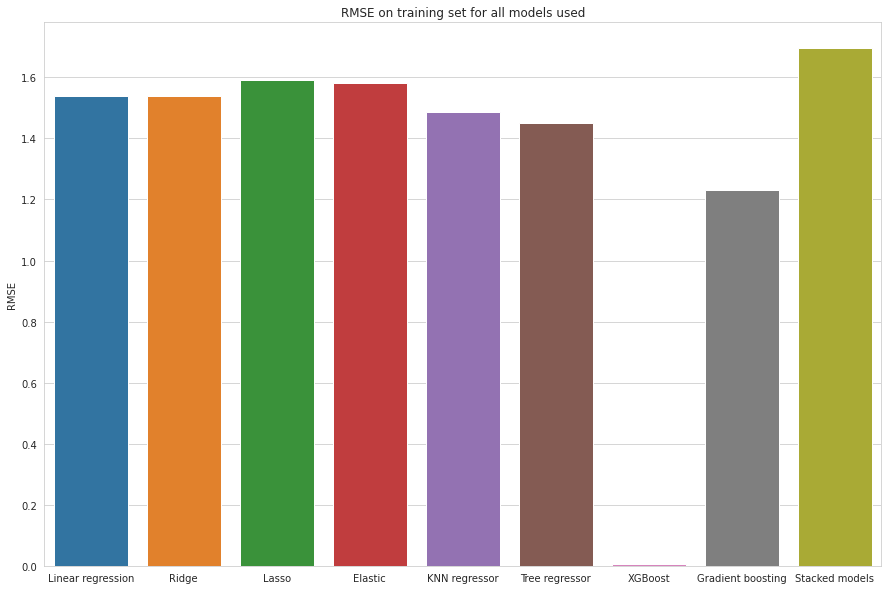

In [617]:
x=['Linear regression', 'Ridge','Lasso','Elastic','KNN regressor','Tree regressor','XGBoost','Gradient boosting','Stacked models']
y_train_rmse=[1.54 , 1.54 , 1.59 , 1.58 , 1.488 , 1.45 , 0.0067  , 1.2306 , 1.696]
y_test_rmse= [1.51 , 1.51 , 1.50 , 1.50 , 1.51  , 1.30 , 1.34255 , 1.2464 , 1.641]
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
x=sns.barplot(x,y_train_rmse,ax=ax)
x.set_title("RMSE on training set for all models used")
x.set(ylabel='RMSE')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'RMSE')]

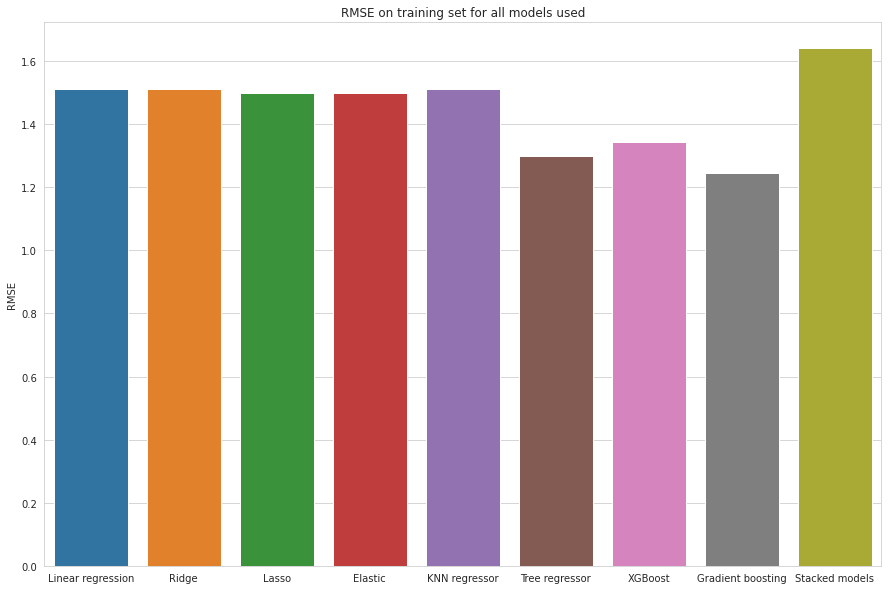

In [619]:
x=['Linear regression', 'Ridge','Lasso','Elastic','KNN regressor','Tree regressor','XGBoost','Gradient boosting','Stacked models']
y_train_rmse=[1.54 , 1.54 , 1.59 , 1.58 , 1.488 , 1.45 , 0.0067  , 1.2306 , 1.696]
y_test_rmse= [1.51 , 1.51 , 1.50 , 1.50 , 1.51  , 1.30 , 1.34255 , 1.2464 , 1.641]
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
x=sns.barplot(x,y_test_rmse,ax=ax)
x.set_title("RMSE on training set for all models used")
x.set(ylabel='RMSE')

### 6.8 Eleastic net on no outliers

In [343]:
#x_train_no_out, y_train_no_out = df_unskweed_train[df_unskweed_train.columns.difference(['G3'])].values,df_unskweed_train['G3'].values

In [344]:
'''params={'alpha': np.arange(0.05, 0.9,0.01),'l1_ratio': np.arange(0.05, 0.9,0.01) ,'fit_intercept':[True,False]}
elstk= ElasticNet()
g_elstk_no_out= GridSearchCV(elstk, params)
g_elstk_no_out.fit(x_train_no_out,y_train_no_out)'''

"params={'alpha': np.arange(0.05, 0.9,0.01),'l1_ratio': np.arange(0.05, 0.9,0.01) ,'fit_intercept':[True,False]}\nelstk= ElasticNet()\ng_elstk_no_out= GridSearchCV(elstk, params)\ng_elstk_no_out.fit(x_train_no_out,y_train_no_out)"

In [345]:
#np.sqrt(mean_squared_error(g_elstk_no_out.best_estimator_.predict(x_train_no_out), y_train_no_out))

In [346]:
#np.sqrt(mean_squared_error(g_elstk_no_out.best_estimator_.predict(x_test), y_test))

np.sqrt(mean_squared_error(g_elstk_no_out.best_estimator_.predict(x_test), y_test))

### 6.8 Random forst

In [347]:
'''params={'n_estimators': np.arange(100, 400,50)
        #,'min_samples_split': np.arange(2, 30,1) 
        #,'criterion':['squared_error','absolute_error','poisson']
        ,'min_samples_leaf':np.arange(1,30,5)
        }
rf = RandomForestRegressor()
g_rf= GridSearchCV(rf, params)
g_rf.fit(x_train,y_train)'''

"params={'n_estimators': np.arange(100, 400,50)\n        #,'min_samples_split': np.arange(2, 30,1) \n        #,'criterion':['squared_error','absolute_error','poisson']\n        ,'min_samples_leaf':np.arange(1,30,5)\n        }\nrf = RandomForestRegressor()\ng_rf= GridSearchCV(rf, params)\ng_rf.fit(x_train,y_train)"

In [348]:
#g_rf.best_estimator_.score(x_train, y_train),g_rf.best_estimator_.score(x_test, y_test)

In [349]:
#np.sqrt(mean_squared_error(g_rf.best_estimator_.predict(x_train), y_train))

In [350]:
#np.sqrt(mean_squared_error(g_rf.best_estimator_.predict(x_test), y_test))

# 8.0 Predicting G3 given G1, and G2 on more clean data

In [244]:
x_train_clean, y_train_clean=df_train_clean[df_train_clean.columns.difference(['G3'])].values,df_train_clean['G3'].values
x_test_clean, y_test_clean=df_test_clean[df_train_clean.columns.difference(['G3'])].values,df_test_clean['G3'].values

### 8.1 Elastic net

In [245]:
params={'alpha': np.arange(0.05, 0.3,0.01),'l1_ratio':np.arange(0.05, 0.3,0.01),'fit_intercept':[True,False]}
elstk_cln= ElasticNet()
g_elstk_cln= GridSearchCV(elstk_cln, params)
g_elstk_cln.fit(x_train_clean,y_train_clean)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29])})

In [246]:
g_elstk_cln.best_estimator_.score(x_train_clean, y_train_clean),g_elstk_cln.best_estimator_.score(x_test_clean, y_test_clean)

(0.8338966287381708, 0.8327569055241911)

In [250]:
np.sqrt(mean_squared_error(g_elstk_cln.best_estimator_.predict(x_train_clean), y_train_clean))

1.5901111290566599

In [248]:
np.sqrt(mean_squared_error(g_elstk_cln.best_estimator_.predict(x_test_clean), y_test_clean))

1.506712030444917

### 8.2 Decision tree

In [251]:
params={'criterion':['squared_error', 'friedman_mse','absolute_error', 'poisson'],'splitter':['best','random'],'max_depth': np.arange(1, 5,1)}
tre_cln= DecisionTreeRegressor()
g_tre_cln= GridSearchCV(tre_cln, params)
g_tre_cln.fit(x_train_clean,y_train_clean)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([1, 2, 3, 4]),
                         'splitter': ['best', 'random']})

In [252]:
g_tre_cln.best_estimator_.score(x_train_clean, y_train_clean),g_tre_cln.best_estimator_.score(x_test_clean, y_test_clean)

(0.8184977451591294, 0.8120069202330353)

In [253]:
np.sqrt(mean_squared_error(g_tre_cln.best_estimator_.predict(x_train_clean), y_train_clean))

1.6621846449031021

In [254]:
np.sqrt(mean_squared_error(g_tre_cln.best_estimator_.predict(x_test_clean), y_test_clean))

1.5974493242637502

# 9.0 Predicting G3 given G1 and G2 after choosing columns using PCA

In [293]:
x_train_pca, y_train_pca=df_train_pca[df_train_pca.columns.difference(['G3'])].values,df_train_pca['G3'].values
x_test_pca, y_test_pca=df_test_pca[df_train_pca.columns.difference(['G3'])].values,df_test_pca['G3'].values

### 9.1 Elastic Net

In [294]:
params={'alpha': np.arange(0.05, 0.3,0.01),'l1_ratio':np.arange(0.05, 0.3,0.01),'fit_intercept':[True,False]}
elstk_pca= ElasticNet()
g_elstk_pca= GridSearchCV(elstk_pca, params)
g_elstk_pca.fit(x_train_pca,y_train_pca)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29])})

In [295]:
g_elstk_pca.best_estimator_.score(x_train_pca, y_train_pca),g_elstk_pca.best_estimator_.score(x_test_pca, y_test_pca)

(0.8454688696062297, 0.771695319591525)

In [296]:
np.sqrt(mean_squared_error(g_elstk_pca.best_estimator_.predict(x_train_pca), y_train_pca))

1.5487847040293998

In [297]:
np.sqrt(mean_squared_error(g_elstk_pca.best_estimator_.predict(x_test_pca), y_test_pca))

1.6895840967178606

### 9.2 Decision tree

In [299]:
params={'criterion':['squared_error', 'friedman_mse','absolute_error', 'poisson'],'splitter':['best','random'],'max_depth': np.arange(1, 10,1)}
tre_pca= DecisionTreeRegressor()
g_tre_pca= GridSearchCV(tre_pca, params)
g_tre_pca.fit(x_train_pca,y_train_pca)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [300]:
g_tre_pca.best_estimator_.score(x_train_pca, y_train_pca),g_tre_pca.best_estimator_.score(x_test_pca, y_test_pca)

(0.8768504584394892, 0.7927030037162881)

In [301]:
np.sqrt(mean_squared_error(g_tre_pca.best_estimator_.predict(x_train_pca), y_train_pca))

1.3826092555581952

In [302]:
np.sqrt(mean_squared_error(g_tre_pca.best_estimator_.predict(x_test_pca), y_test_pca))

1.6099741768071354

### 9.3 KNN regressor

In [305]:
params={'n_neighbors': np.arange(1, 30,1),'weights':['uniform', 'distance'],'p': np.arange(1, 20,1)}
nrst_pca= KNeighborsRegressor()
g_nrst_pca= GridSearchCV(nrst_pca, params)
g_nrst_pca.fit(x_train_pca,y_train_pca)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [306]:
g_nrst_pca.best_estimator_.score(x_train_pca, y_train_pca),g_nrst_pca.best_estimator_.score(x_test_pca, y_test_pca)

(0.9999614239808493, 0.7487286667897813)

In [307]:
np.sqrt(mean_squared_error(g_nrst_pca.best_estimator_.predict(x_train_pca), y_train_pca))

0.02447043921161982

In [308]:
np.sqrt(mean_squared_error(g_nrst_pca.best_estimator_.predict(x_test_pca), y_test_pca))

1.7725311562377177

# 10.0 Models for perdicting G3 not given G1, nor G2

In [351]:
x_train_no_g, y_train_no_g=df_train[df_train.columns.difference(['G1','G2','G3'])].values,df_train['G3'].values
x_test_no_g, y_test_no_g=df_test[df_train.columns.difference(['G1','G2','G3'])].values,df_test['G3'].values

### 10.1 Linear regression

In [352]:
lin_model_nog = LinearRegression()
lin_model_nog.fit(x_train_no_g,y_train_no_g)

LinearRegression()

In [353]:
lin_model_nog.score(x_train_no_g, y_train_no_g)

0.2286791310288414

In [354]:
lin_model_nog.score(x_test_no_g, y_test_no_g)

0.284824940196854

So bad

### 10.2 Ridge

In [355]:
params={'alpha': np.arange(0.05, 0.6,0.01),'fit_intercept':[True,False]}
ridge_nog= Ridge()
g_ridge_nog= GridSearchCV(ridge_nog, params)
g_ridge_nog.fit(x_train_no_g,y_train_no_g)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]),
                         'fit_intercept': [True, False]})

In [356]:
g_ridge_nog.best_estimator_.score(x_train_no_g, y_train_no_g),g_ridge_nog.best_estimator_.score(x_test_no_g, y_test_no_g)

(0.22862013988260488, 0.2823525436716625)

In [357]:
np.sqrt(mean_squared_error(g_ridge_nog.best_estimator_.predict(x_train_no_g), y_train_no_g))

3.4266709398205655

In [358]:
np.sqrt(mean_squared_error(g_ridge_nog.best_estimator_.predict(x_test_no_g), y_test_no_g))

3.121129104890608

###10.3 Elastic net

In [363]:
params={'alpha': np.arange(0.05, 0.3,0.01),'l1_ratio':np.arange(0.05, 0.3,0.01),'fit_intercept':[True,False]}
elstk_nog= ElasticNet()
g_elstk_nog= GridSearchCV(elstk_nog, params)
g_elstk_nog.fit(x_train_no_g,y_train_no_g)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29])})

In [368]:
g_elstk_nog.best_estimator_.score(x_train_no_g, y_train_no_g),g_elstk_nog.best_estimator_.score(x_test_no_g, y_test_no_g)

(0.2165004246101192, 0.2830453484869434)

In [364]:
np.sqrt(mean_squared_error(g_elstk_nog.best_estimator_.predict(x_train_no_g), y_train_no_g))

3.453485495893102

In [365]:
np.sqrt(mean_squared_error(g_elstk_nog.best_estimator_.predict(x_test_no_g), y_test_no_g))

3.119622198277876

### 10.4 KNN regressor

In [367]:
params={'n_neighbors': np.arange(1, 30,1),'weights':['uniform', 'distance'],'p': np.arange(1, 2,1)}
nrst_n_nog= KNeighborsRegressor()
g_nrst_nog= GridSearchCV(nrst_n_nog, params)
g_nrst_nog.fit(x_train_no_g,y_train_no_g)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': array([1]), 'weights': ['uniform', 'distance']})

In [369]:
g_nrst_nog.best_estimator_.score(x_train_no_g, y_train_no_g),g_nrst_nog.best_estimator_.score(x_test_no_g, y_test_no_g)

(0.990677006797901, 0.23864607383015235)

In [370]:
np.sqrt(mean_squared_error(g_nrst_nog.best_estimator_.predict(x_train_no_g), y_train_no_g))

0.37671762324673724

In [371]:
np.sqrt(mean_squared_error(g_nrst_nog.best_estimator_.predict(x_test_no_g), y_test_no_g))

3.2147666510314923

### 10.5 tree regressor

In [372]:
params={'criterion':['squared_error', 'friedman_mse','absolute_error', 'poisson'],'splitter':['best','random'],'max_depth': np.arange(1, 5,1)}
tre_nog= DecisionTreeRegressor()
g_tre_nog= GridSearchCV(tre_nog, params)
g_tre_nog.fit(x_train_no_g,y_train_no_g)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([1, 2, 3, 4]),
                         'splitter': ['best', 'random']})

In [373]:
g_tre_nog.best_estimator_.score(x_train_no_g, y_train_no_g),g_tre_nog.best_estimator_.score(x_test_no_g, y_test_no_g)

(0.18926788386966042, 0.4353100538260547)

In [374]:
np.sqrt(mean_squared_error(g_tre_nog.best_estimator_.predict(x_train_no_g), y_train_no_g))

3.5129902330193055

In [375]:
np.sqrt(mean_squared_error(g_tre_nog.best_estimator_.predict(x_test_no_g), y_test_no_g))

2.7686061954012042

### 10.6 XGBoost

In [376]:
xgv_nog= xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgv_nog, x_train_no_g,y_train_no_g, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [377]:
scores = np.abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.656 (0.265)


In [380]:
y_train_pred=xgv_nog.fit(x_train_no_g,y_train_no_g)

[16:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [381]:
np.sqrt(mean_squared_error(xgv_nog.predict(x_test_no_g), y_test_no_g))

2.808862696484208

In [382]:
np.sqrt(mean_squared_error(xgv.predict(x_test_no_g), y_test_no_g))

2.808862696484208

### 10.7 Gradient boosting

In [383]:
params={'learning_rate':np.arange(0.05,1,0.05),'n_estimators':np.arange(100,300,50)}
g_boosting_nog = GradientBoostingRegressor()
g_boosting_nog= GridSearchCV(g_boosting_nog, params)
g_boosting_nog.fit(x_train_no_g,y_train_no_g)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([100, 150, 200, 250])})

In [385]:
np.sqrt(mean_squared_error(g_boosting_nog.predict(x_train_no_g), y_train_no_g))

2.93093683963306

In [386]:
np.sqrt(mean_squared_error(g_boosting_nog.predict(x_test_no_g), y_test_no_g))

2.717628577133906

### 10.8 Stacked models

In [387]:
estimators = [
     ('g_elstk_nog', g_elstk_nog.best_estimator_),
     ('g_nrst_nog', g_nrst_nog.best_estimator_),
     ('g_tre_nog',g_tre_nog.best_estimator_),
     ('xgv_nog',xgv_nog),
     ('g_boosting_nog',g_boosting_nog)
 ]
reg_nog = StackingRegressor(estimators=estimators,
     final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))
reg_nog.fit(x_train_no_g,y_train_no_g)

[16:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(estimators=[('g_elstk_nog',
                               ElasticNet(alpha=0.07,
                                          l1_ratio=0.24000000000000005)),
                              ('g_nrst_nog',
                               KNeighborsRegressor(n_neighbors=19, p=1,
                                                   weights='distance')),
                              ('g_tre_nog', DecisionTreeRegressor(max_depth=2)),
                              ('xgv_nog',
                               XGBRegressor(colsample_bytree=0.8, eta=0.1,
                                            max_depth=7, n_estimators=1000,
                                            subsample=0.7)),
                              ('g_boosting_nog',
                               GridSearchCV(estimator=GradientBoostingRegressor(),
                                            param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 

In [389]:
np.sqrt(mean_squared_error(reg_nog.predict(x_train_no_g), y_train_no_g))

2.4213005336220514

In [390]:
np.sqrt(mean_squared_error(reg_nog.predict(x_test_no_g), y_test_no_g))

2.9718376256013594

### 10.9 Summary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'RMSE')]

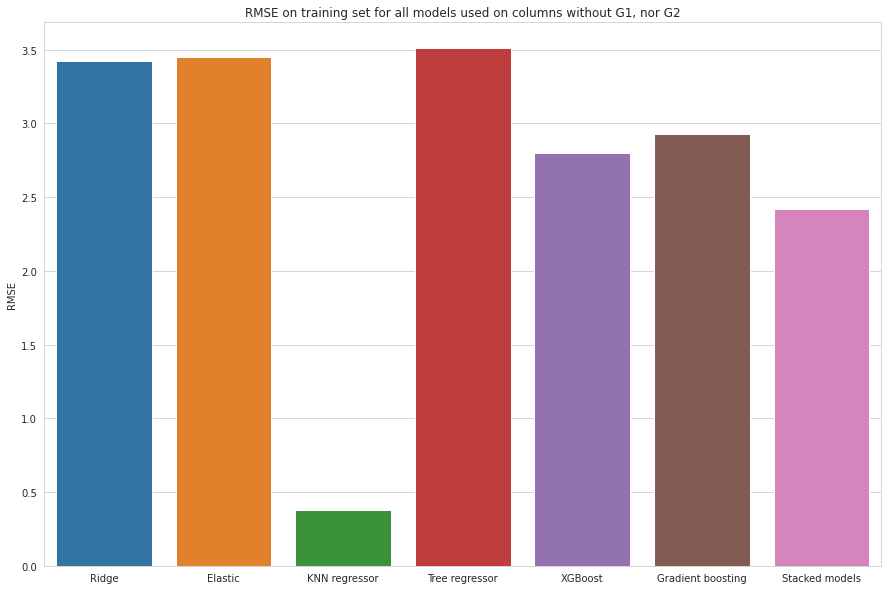

In [628]:
x=['Ridge','Elastic','KNN regressor','Tree regressor','XGBoost','Gradient boosting','Stacked models']
y_train_rmse=[3.42 , 3.45 , 0.376 , 3.51 , 2.8 , 2.93 , 2.42 ]
y_test_rmse= [3.121 , 3.11 , 3.2147 , 2.768 , 2.8  , 2.7 , 2.97]
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
x=sns.barplot(x,y_train_rmse,ax=ax)
x.set_title("RMSE on training set for all models used on columns without G1, nor G2")
x.set(ylabel='RMSE')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'RMSE')]

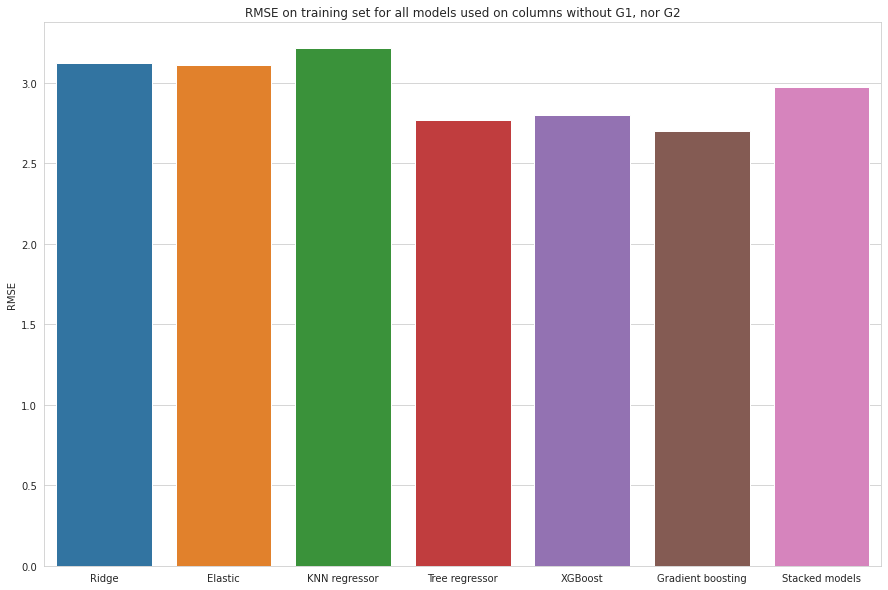

In [623]:
x=['Ridge','Elastic','KNN regressor','Tree regressor','XGBoost','Gradient boosting','Stacked models']
y_train_rmse=[3.42 , 3.45 , 0.376 , 3.51 , 2.8 , 2.93 , 2.42 ]
y_test_rmse= [3.121 , 3.11 , 3.2147 , 2.768 , 2.8  , 2.7 , 2.97]
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
x=sns.barplot(x,y_test_rmse,ax=ax)
x.set_title("RMSE on training set for all models used on columns without G1, nor G2")
x.set(ylabel='RMSE')

# 11.0 Classificatoin for grades not Given G1, and G2

In [539]:
df_disc_train.final_grade=df_disc_train.final_grade.astype('int')
df_disc_test.final_grade=df_disc_test.final_grade.astype('int')
df_disc_train.head()

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GP,MS,is_male,is_female,R,U,both_educated_high,both_not_educated,one_educated_high,both_at_home,only_one_working,both_working,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,course,home,other,reputation,is_guardian_mo,is_school_supporting,is_family_supporting,is_paid,final_grade
877,18,0,1,0,0,4,2,0,1,1,1,1,1,4,3,2,4,5,3,14,10,8,9,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,2,1,1,1,0
847,17,1,1,0,0,2,1,1,0,1,1,1,0,4,2,4,2,3,2,24,18,18,18,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,2,0,1,0,2
504,19,0,1,0,0,1,3,0,0,1,1,1,1,5,4,5,1,1,1,0,12,13,13,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,1
483,16,1,1,0,0,3,2,0,0,1,0,1,0,3,4,5,1,2,1,1,9,10,11,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
51,15,0,1,0,0,1,2,0,0,1,1,1,0,4,3,3,1,1,5,0,16,14,16,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2,0,1,0,2


In [540]:
x_train_disc, y_train_disc=df_disc_train[df_disc_train.columns.difference(['G1','G2','G3','final_grade'])].values,df_disc_train['final_grade'].values
x_test_disc, y_test_disc=df_disc_test[df_disc_train.columns.difference(['G1','G2','G3','final_grade'])].values,df_disc_test['final_grade'].values

### 11.1 Logistic regression

In [624]:
#params={'fit_intercept':[True,False],'max_iter':np.arange(100,1500,500),'l1_ratio':np.arange(0.05,1,0.05)}
#lg_reg = LogisticRegression()
#g_lg_reg= GridSearchCV(lg_reg, params)
#g_lg_reg.fit(x_train_disc, y_train_disc)

In [439]:
#g_lg_reg.best_estimator_.score(x_train_disc, y_train_disc)

In [440]:
#g_lg_reg.best_estimator_.score(x_test_disc, y_test_disc)

### 11.2 SVC

In [536]:
svc=SVC(gamma='auto')
svc.fit(x_train_disc, y_train_disc)

SVC(gamma='auto')

In [537]:
svc.score(x_train_disc, y_train_disc)

0.6203592814371257

In [541]:
svc.score(x_test_disc, y_test_disc)

0.631578947368421

### 11.3 Naive bays

In [542]:
nb =  GaussianNB()
nb.fit(x_train_disc, y_train_disc)

GaussianNB()

In [543]:
nb.score(x_train_disc, y_train_disc)

0.4023952095808383

In [544]:
nb.score(x_test_disc, y_test_disc)

0.3827751196172249

### 11.4 KNN classifier

In [468]:
params={'n_neighbors':np.arange(5,50,1),'p':np.arange(1,2,1)}
knn_c = KNeighborsClassifier()
g_knnc= GridSearchCV(knn_c, params)
g_knnc.fit(x_train_disc, y_train_disc)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': array([1])})

In [469]:
g_knnc.score(x_train_disc, y_train_disc)

0.6131736526946108

In [470]:
g_knnc.score(x_test_disc, y_test_disc)

0.5980861244019139

### 11.5 Decision tree

In [478]:
params={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_depth': np.arange(1, 5,1),'min_samples_leaf':np.arange(1,60,1)}
tre_c= DecisionTreeClassifier()
g_tre_c= GridSearchCV(tre_c, params)
g_tre_c.fit(x_train_disc, y_train_disc)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'splitter': ['best', 'random']})

In [479]:
g_tre_c.score(x_train_disc, y_train_disc)

0.6

In [480]:
g_tre_c.score(x_test_disc, y_test_disc)

0.6411483253588517

In [546]:
accuracy_score(y_test_disc, g_tre_c.predict(x_test_disc), normalize=False)

0

### 11.6 Random Forest

In [553]:
params={'max_depth': np.arange(1, 20,1)}
rf_c = RandomForestClassifier()
g_rf_c= GridSearchCV(rf_c, params)
g_rf_c.fit(x_train_disc, y_train_disc)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [556]:
g_rf_c.score(x_train_disc, y_train_disc)

0.7796407185628742

In [557]:
g_rf_c.score(x_test_disc, y_test_disc)

0.6267942583732058

### 11.7 Gradient Boosting Classifier

In [559]:
params={'learning_rate':np.arange(0.05,1,0.05),'n_estimators':np.arange(100,300,50)}
gb_c = GradientBoostingRegressor()
g_gb_c= GridSearchCV(gb_c, params)
g_gb_c.fit(x_train_disc, y_train_disc)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([100, 150, 200, 250])})

In [560]:
g_gb_c.score(x_train_disc, y_train_disc)

0.512644738503327

In [561]:
g_gb_c.score(x_test_disc, y_test_disc)

0.30773644503839004

# 12.0 Classification for grades given G1, and G2

In [564]:
x_train_disc_given, y_train_disc_given=df_disc_train[df_disc_train.columns.difference(['G3','final_grade'])].values,df_disc_train['final_grade'].values
x_test_disc_given, y_test_disc_given=df_disc_test[df_disc_train.columns.difference(['G3','final_grade'])].values,df_disc_test['final_grade'].values

### 12.1 Logistic regression

In [625]:
#params={'fit_intercept':[True,False],'max_iter':np.arange(100,1500,500),'l1_ratio':np.arange(0.05,1,0.05)}
#lg_reg_given = LogisticRegression()
#g_lg_reg_given= GridSearchCV(lg_reg_given, params)
#g_lg_reg_given.fit(x_train_disc_given, y_train_disc_given)

### 12.2 SVC

In [566]:
svc=SVC(gamma='auto')
svc.fit(x_train_disc_given, y_train_disc_given)

SVC(gamma='auto')

In [567]:
svc.score(x_test_disc_given, y_test_disc_given)

0.861244019138756

In [568]:
svc.score(x_test_disc_given, y_test_disc_given)

0.861244019138756

### 12.3 Decision tree

### 12.4 naive bays

### 12 .5knn classifier

### 12.6 gradient boosting

### 12.7 Stacked models

# 13.0 predicting parent status

In [569]:
x_parent_train, y_parent_train =df_train[df_train.columns.difference(['Pstatus'])].values,df_train['Pstatus'].values
x_parent_test, y_parent_test=df_test[df_train.columns.difference(['Pstatus'])].values,df_test['Pstatus'].values

### 13.1 Descision Tree

In [570]:
params={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_depth': np.arange(1, 5,1),'min_samples_leaf':np.arange(1,60,1)}
tre_ps= DecisionTreeClassifier()
g_tre_ps= GridSearchCV(tre_ps, params)
g_tre_ps.fit(x_parent_train, y_parent_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'splitter': ['best', 'random']})

In [575]:
g_tre_ps.score(x_parent_train, y_parent_train)

0.8862275449101796

In [576]:
g_tre_ps.score(x_parent_test, y_parent_test)

0.8564593301435407

### 13.2 KNN classfier

In [ ]:
params={'n_neighbors':np.arange(5,50,1),'p':np.arange(1,2,1)}
knn_c = KNeighborsClassifier()
g_knn_p= GridSearchCV(knn_c, params)
g_knn_p.fit(x_parent_test, y_parent_test)

In [578]:
g_knn_p.score(x_parent_train, y_parent_train)

0.8778443113772455

In [579]:
g_knn_p.score(x_parent_test, y_parent_test)

0.8995215311004785

# 14.0 predicting mother educatoin 

In [629]:
df_train

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GP,MS,is_male,is_female,R,U,both_educated_high,both_not_educated,one_educated_high,both_at_home,only_one_working,both_working,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,course,home,other,reputation,is_guardian_mo,is_school_supporting,is_family_supporting,is_paid
877,18,0,1,0,0,4,2,0,1,1,1,1,1,4,3,2,4,5,3,14,10,8,9,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,2,1,1,1
847,17,1,1,0,0,2,1,1,0,1,1,1,0,4,2,4,2,3,2,24,18,18,18,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,2,0,1,0
504,19,0,1,0,0,1,3,0,0,1,1,1,1,5,4,5,1,1,1,0,12,13,13,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0
483,16,1,1,0,0,3,2,0,0,1,0,1,0,3,4,5,1,2,1,1,9,10,11,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
51,15,0,1,0,0,1,2,0,0,1,1,1,0,4,3,3,1,1,5,0,16,14,16,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,18,1,1,0,0,2,2,3,0,1,1,1,0,3,3,3,5,5,4,9,10,9,10,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2,0,1,1
140,17,1,1,0,0,3,2,0,0,1,1,0,0,5,4,5,2,4,5,2,10,9,10,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0
350,19,0,1,0,0,2,3,1,1,1,1,1,1,4,3,1,1,1,5,0,9,10,11,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0
390,18,1,1,0,0,2,4,0,1,1,1,0,0,4,4,4,1,1,4,6,14,13,14,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0


In [586]:
x_medu_train, y_medu_train =df_train[df_train.columns.difference(['Medu','one_educated_high','both_not_educated','both_educated_high'])].values,df_train['Medu'].values
x_medu_test, y_medu_test=df_test[df_train.columns.difference(['Medu','one_educated_high','both_not_educated','both_educated_high'])].values,df_test['Medu'].values

### 14.1 Decision tree

In [587]:
params={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_depth': np.arange(1, 5,1),'min_samples_leaf':np.arange(1,60,1)}
tre_med= DecisionTreeClassifier()
g_tre_med= GridSearchCV(tre_med, params)
g_tre_med.fit(x_medu_train, y_medu_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'splitter': ['best', 'random']})

In [588]:
g_tre_med.score(x_medu_train, y_medu_train)

1.0

In [589]:
g_tre_med.score(x_medu_test, y_medu_test)

1.0

# 15.0 predicting father education

In [597]:
x_father_train, y_father_train =df_train[df_train.columns.difference(['Fedu','one_educated_high','both_not_educated','both_educated_high'])].values,df_train['Fedu'].values
x_father_test, y_father_test=df_test[df_train.columns.difference(['Fedu','one_educated_high','both_not_educated','both_educated_high'])].values,df_test['Fedu'].values

### 15.1 Decision tree

In [598]:
params={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_depth': np.arange(1, 5,1),'min_samples_leaf':np.arange(1,60,1)}
tre_fed= DecisionTreeClassifier()
g_tre_fed= GridSearchCV(tre_fed, params)
g_tre_fed.fit(x_father_train, y_father_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'splitter': ['best', 'random']})

In [600]:
g_tre_fed.score(x_medu_train, y_medu_train)

1.0

In [599]:
g_tre_fed.score(x_medu_test, y_medu_test)

1.0

# 16.0 Predicting abscense 

In [642]:
x_train_ab, y_train_ab=df_train[df_train.columns.difference(['absences'])].values,df_train['absences'].values
x_test_ab, y_test_ab=df_test[df_train.columns.difference(['absences'])].values,df_test['absences'].values

### 16.1 Elastic

In [643]:
params={'alpha': np.arange(0.05, 0.3,0.01),'l1_ratio':np.arange(0.05, 0.3,0.01),'fit_intercept':[True,False]}
elstk_ab= ElasticNet()
g_elstk_ab= GridSearchCV(elstk_ab, params)
g_elstk_ab.fit(x_train_ab,y_train_ab)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29])})

In [644]:
g_elstk_ab.best_estimator_.score(x_train_ab, y_train_ab),g_elstk_ab.best_estimator_.score(x_test_ab, y_test_ab)

(0.1323333628916571, 0.09736951335613098)

In [645]:
np.sqrt(mean_squared_error(g_elstk_ab.best_estimator_.predict(x_train_ab), y_train_ab))

5.562619449640923

In [646]:
np.sqrt(mean_squared_error(g_elstk_ab.best_estimator_.predict(x_test_ab), y_test_ab))

6.702704433498207

### 16.2 Decision regressor


In [647]:
params={'criterion':['squared_error', 'friedman_mse','absolute_error', 'poisson'],'splitter':['best','random'],'max_depth': np.arange(1, 5,1)}
tre_ab= DecisionTreeRegressor()
g_tre_ab= GridSearchCV(tre_ab, params)
g_tre_ab.fit(x_train_ab,y_train_ab)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([1, 2, 3, 4]),
                         'splitter': ['best', 'random']})

In [648]:
g_tre_ab.best_estimator_.score(x_train_ab, y_train_ab),g_tre_ab.best_estimator_.score(x_test_ab, y_test_ab)

(0.07278686460654882, 0.06054659827940201)

In [649]:
np.sqrt(mean_squared_error(g_tre_ab.best_estimator_.predict(x_train_ab), y_train_ab))

5.7503289366841654

In [650]:
np.sqrt(mean_squared_error(g_tre_ab.best_estimator_.predict(x_test_ab), y_test_ab))

6.838056606438875